In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as ctx
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns


In [2]:
import geopandas as gpd
import contextily as ctx
# https://www.kaggle.com/code/sunxyz/visualizing-district-level-2011-indian-census-data

In [2]:
# https://www.kaggle.com/datasets/krutarthhd/india-geojson-file
dist = gpd.read_file('data/india_district.geojson')


dist["District"] = dist["NAME_2"]


In [3]:
# read census_2011.csv file
census=pd.read_csv('data/census_2011.csv')


census.head()

District code         State name District name  Population      Male  \
0              1  JAMMU AND KASHMIR       Kupwara    870354.0  474190.0   
1              2  JAMMU AND KASHMIR        Badgam    753745.0       NaN   
2              3  JAMMU AND KASHMIR   Leh(Ladakh)    133487.0   78971.0   
3              4  JAMMU AND KASHMIR        Kargil    140802.0       NaN   
4              5  JAMMU AND KASHMIR         Punch         NaN  251899.0   

     Female  Literate  Male_Literate  Female_Literate      SC  ...  \
0  396164.0  439654.0       282823.0         156831.0  1048.0  ...   
1  355704.0  335649.0       207741.0         127908.0     NaN  ...   
2   54516.0   93770.0        62834.0          30936.0   488.0  ...   
3   63017.0       NaN        56301.0          29935.0    18.0  ...   
4  224936.0  261724.0       163333.0          98391.0   556.0  ...   

   Power_Parity_Rs_90000_150000  Power_Parity_Rs_45000_150000  \
0                          94.0                         588.0   
1                         126.0                         562.0   
2                          46.0                         122.0   
3                          27.0                         114.0   
4                          78.0                         346.0   

   Power_Parity_Rs_150000_240000  Power_Parity_Rs_240000_330000  \
0                           71.0                          101.0   
1                           72.0                           89.0   
2                           15.0                           22.0   
3                           12.0                           18.0   
4                           35.0                           50.0   

   Power_Parity_Rs_150000_330000  Power_Parity_Rs_330000_425000  \
0                          172.0                           74.0   
1                          161.0                           96.0   
2                            NaN                           20.0   
3                           30.0                           19.0   
4                           85.0                           59.0   

   Power_Parity_Rs_425000_545000  Power_Parity_Rs_330000_545000  \
0                           10.0                           84.0   
1                           28.0                          124.0   
2                            NaN                            NaN   
3                            3.0                           22.0   
4                            8.0                           67.0   

   Power_Parity_Above_Rs_545000  Total_Power_Parity  
0                          15.0              1119.0  
1                          18.0              1066.0  
2                          17.0               242.0  
3                           7.0               214.0  
4                          12.0               629.0  

[5 rows x 118 columns]

### Problem Statement 1 : (Keep the relevant data)
        There are 118 columns in this data frame.
        So reduce no of columns and keep one that are relatable

In [4]:
df=census.copy()
df=df[['State name','District name','Population','Male','Female','Literate','Male_Literate','Female_Literate',
         'Rural_Households','Urban_Households','Households','Age_Group_0_29','Age_Group_30_49','Age_Group_50',
         'Age not stated']]

df.head()

State name District name  Population      Male    Female  Literate  \
0  JAMMU AND KASHMIR       Kupwara    870354.0  474190.0  396164.0  439654.0   
1  JAMMU AND KASHMIR        Badgam    753745.0       NaN  355704.0  335649.0   
2  JAMMU AND KASHMIR   Leh(Ladakh)    133487.0   78971.0   54516.0   93770.0   
3  JAMMU AND KASHMIR        Kargil    140802.0       NaN   63017.0       NaN   
4  JAMMU AND KASHMIR         Punch         NaN  251899.0  224936.0  261724.0   

   Male_Literate  Female_Literate  Rural_Households  Urban_Households  \
0       282823.0         156831.0          158438.0               NaN   
1       207741.0         127908.0          160649.0           27190.0   
2        62834.0          30936.0           36920.0           17474.0   
3        56301.0          29935.0           40370.0            7774.0   
4       163333.0          98391.0          132139.0           15269.0   

   Households  Age_Group_0_29  Age_Group_30_49  Age_Group_50  Age not stated  
0    181664.0        600759.0         178435.0       89679.0          1481.0  
1    187839.0        503223.0         160933.0       88978.0           611.0  
2     54394.0         70703.0          41515.0           NaN           250.0  
3     48144.0         87532.0          35561.0       17488.0           221.0  
4    147408.0        304979.0         109818.0       61334.0           704.0

### Problem Statement 2: (Rename the Column names)

In [5]:
df.rename({'State name':'State/UT',
           'District name':'District',
           'Male_Literate':'Literate_Male',
           'Female_Literate':'Literate_Female',
           'Rural_Households':'Households_Rural',
           'Urban_Households':'Households_Urban',
           'Age_Group_0_29':'Young_and_Adult',
           'Age_Group_30_49':'Middle_Aged',
           'Age_Group_50':'Senior_Citizen',
           'Age not stated':'Age_Not_Stated'},
         axis=1,
         inplace=True)

df.head()

State/UT     District  Population      Male    Female  Literate  \
0  JAMMU AND KASHMIR      Kupwara    870354.0  474190.0  396164.0  439654.0   
1  JAMMU AND KASHMIR       Badgam    753745.0       NaN  355704.0  335649.0   
2  JAMMU AND KASHMIR  Leh(Ladakh)    133487.0   78971.0   54516.0   93770.0   
3  JAMMU AND KASHMIR       Kargil    140802.0       NaN   63017.0       NaN   
4  JAMMU AND KASHMIR        Punch         NaN  251899.0  224936.0  261724.0   

   Literate_Male  Literate_Female  Households_Rural  Households_Urban  \
0       282823.0         156831.0          158438.0               NaN   
1       207741.0         127908.0          160649.0           27190.0   
2        62834.0          30936.0           36920.0           17474.0   
3        56301.0          29935.0           40370.0            7774.0   
4       163333.0          98391.0          132139.0           15269.0   

   Households  Young_and_Adult  Middle_Aged  Senior_Citizen  Age_Not_Stated  
0    181664.0         600759.0     178435.0         89679.0          1481.0  
1    187839.0         503223.0     160933.0         88978.0           611.0  
2     54394.0          70703.0      41515.0             NaN           250.0  
3     48144.0          87532.0      35561.0         17488.0           221.0  
4    147408.0         304979.0     109818.0         61334.0           704.0

### Problem Statement 3: (Rename State/UT Names)

In [6]:
df['State/UT']=df['State/UT'].str.replace('ORISSA','Odisha')

df['State/UT']=df['State/UT'].str.replace('PONDICHERRY','PUDUCHERRY')

df['District']=df['District'].str.replace('PONDICHERRY','PUDUCHERRY')

df['State/UT']=df['State/UT'].str.replace('NCT OF DELHI' , 'Delhi')


In [7]:
df.nunique()

State/UT             35
District            634
Population          610
Male                610
Female              607
Literate            604
Literate_Male       609
Literate_Female     613
Households_Rural    590
Households_Urban    604
Households          608
Young_and_Adult     609
Middle_Aged         610
Senior_Citizen      608
Age_Not_Stated      576
dtype: int64

In [8]:
df['State/UT'].unique()

array(['JAMMU AND KASHMIR', 'HIMACHAL PRADESH', 'PUNJAB', 'CHANDIGARH',
       'UTTARAKHAND', 'HARYANA', 'Delhi', 'RAJASTHAN', 'UTTAR PRADESH',
       'BIHAR', 'SIKKIM', 'ARUNACHAL PRADESH', 'NAGALAND', 'MANIPUR',
       'MIZORAM', 'TRIPURA', 'MEGHALAYA', 'ASSAM', 'WEST BENGAL',
       'JHARKHAND', 'Odisha', 'CHHATTISGARH', 'MADHYA PRADESH', 'GUJARAT',
       'DAMAN AND DIU', 'DADRA AND NAGAR HAVELI', 'MAHARASHTRA',
       'ANDHRA PRADESH', 'KARNATAKA', 'GOA', 'LAKSHADWEEP', 'KERALA',
       'TAMIL NADU', 'PUDUCHERRY', 'ANDAMAN AND NICOBAR ISLANDS'],
      dtype=object)

In [9]:
def format_statename(df):
    df['State/UT']=df['State/UT'].apply(lambda x: x.title())
    df['State/UT']=df['State/UT'].str.replace(' And ',' and ')
    df['State/UT']=df['State/UT'].str.replace(' Of ',' of ')
    df['District']=df['District'].apply(lambda x: x.title())
    

In [10]:
format_statename(df)
df.head()

State/UT     District  Population      Male    Female  Literate  \
0  Jammu and Kashmir      Kupwara    870354.0  474190.0  396164.0  439654.0   
1  Jammu and Kashmir       Badgam    753745.0       NaN  355704.0  335649.0   
2  Jammu and Kashmir  Leh(Ladakh)    133487.0   78971.0   54516.0   93770.0   
3  Jammu and Kashmir       Kargil    140802.0       NaN   63017.0       NaN   
4  Jammu and Kashmir        Punch         NaN  251899.0  224936.0  261724.0   

   Literate_Male  Literate_Female  Households_Rural  Households_Urban  \
0       282823.0         156831.0          158438.0               NaN   
1       207741.0         127908.0          160649.0           27190.0   
2        62834.0          30936.0           36920.0           17474.0   
3        56301.0          29935.0           40370.0            7774.0   
4       163333.0          98391.0          132139.0           15269.0   

   Households  Young_and_Adult  Middle_Aged  Senior_Citizen  Age_Not_Stated  
0    181664.0         600759.0     178435.0         89679.0          1481.0  
1    187839.0         503223.0     160933.0         88978.0           611.0  
2     54394.0          70703.0      41515.0             NaN           250.0  
3     48144.0          87532.0      35561.0         17488.0           221.0  
4    147408.0         304979.0     109818.0         61334.0           704.0

### Problem Statement 4: (New State/UT formation)

In [11]:
def change_state(df):
    with open('data/Telangana.txt','r') as fptr:
        telangana = fptr.readlines()
    telangana=[x[:-1] for x in telangana]
    df.loc[df['District'].isin(telangana),'State/UT']='Telangana'
    df.loc[df['District'].isin(['Leh(Ladakh)' ,'Kargil']),'State/UT']='Laddakh'

In [12]:
change_state(df)

In [13]:
df.head()

State/UT     District  Population      Male    Female  Literate  \
0  Jammu and Kashmir      Kupwara    870354.0  474190.0  396164.0  439654.0   
1  Jammu and Kashmir       Badgam    753745.0       NaN  355704.0  335649.0   
2            Laddakh  Leh(Ladakh)    133487.0   78971.0   54516.0   93770.0   
3            Laddakh       Kargil    140802.0       NaN   63017.0       NaN   
4  Jammu and Kashmir        Punch         NaN  251899.0  224936.0  261724.0   

   Literate_Male  Literate_Female  Households_Rural  Households_Urban  \
0       282823.0         156831.0          158438.0               NaN   
1       207741.0         127908.0          160649.0           27190.0   
2        62834.0          30936.0           36920.0           17474.0   
3        56301.0          29935.0           40370.0            7774.0   
4       163333.0          98391.0          132139.0           15269.0   

   Households  Young_and_Adult  Middle_Aged  Senior_Citizen  Age_Not_Stated  
0    181664.0         600759.0     178435.0         89679.0          1481.0  
1    187839.0         503223.0     160933.0         88978.0           611.0  
2     54394.0          70703.0      41515.0             NaN           250.0  
3     48144.0          87532.0      35561.0         17488.0           221.0  
4    147408.0         304979.0     109818.0         61334.0           704.0

In [14]:
df

State/UT                   District  Population  \
0              Jammu and Kashmir                    Kupwara    870354.0   
1              Jammu and Kashmir                     Badgam    753745.0   
2                        Laddakh                Leh(Ladakh)    133487.0   
3                        Laddakh                     Kargil    140802.0   
4              Jammu and Kashmir                      Punch         NaN   
..                           ...                        ...         ...   
635                   Puducherry                       Mahe     41816.0   
636                   Puducherry                   Karaikal    200222.0   
637  Andaman and Nicobar Islands                   Nicobars     36842.0   
638  Andaman and Nicobar Islands  North  And Middle Andaman    105597.0   
639  Andaman and Nicobar Islands              South Andaman         NaN   

         Male    Female  Literate  Literate_Male  Literate_Female  \
0    474190.0  396164.0  439654.0       282823.0         156831.0   
1         NaN  355704.0  335649.0       207741.0         127908.0   
2     78971.0   54516.0   93770.0        62834.0          30936.0   
3         NaN   63017.0       NaN        56301.0          29935.0   
4    251899.0  224936.0  261724.0       163333.0          98391.0   
..        ...       ...       ...            ...              ...   
635   19143.0   22673.0   36470.0        16610.0          19860.0   
636   97809.0  102413.0  154916.0        79903.0          75013.0   
637   20727.0       NaN   25332.0        15397.0           9935.0   
638   54861.0   50736.0   78683.0        43186.0          35497.0   
639  127283.0  110859.0  190266.0       105794.0          84472.0   

     Households_Rural  Households_Urban  Households  Young_and_Adult  \
0            158438.0               NaN    181664.0         600759.0   
1            160649.0           27190.0    187839.0         503223.0   
2             36920.0           17474.0     54394.0          70703.0   
3             40370.0            7774.0     48144.0          87532.0   
4            132139.0           15269.0    147408.0         304979.0   
..                ...               ...         ...              ...   
635               0.0           12110.0     12110.0          19760.0   
636           35618.0           33715.0     69333.0              NaN   
637           15958.0               0.0     15958.0          18786.0   
638           39091.0            1094.0     40185.0          57350.0   
639           34901.0           50631.0     85532.0         128402.0   

     Middle_Aged  Senior_Citizen  Age_Not_Stated  
0       178435.0         89679.0          1481.0  
1       160933.0         88978.0           611.0  
2        41515.0             NaN           250.0  
3        35561.0         17488.0           221.0  
4       109818.0         61334.0           704.0  
..           ...             ...             ...  
635          NaN          9428.0            85.0  
636      60089.0             NaN           366.0  
637      12088.0          5922.0            46.0  
638      30741.0         17464.0            42.0  
639      76332.0         33128.0           280.0  

[640 rows x 15 columns]

### Problem Statement 5: (Find and process Missing Data)

In [15]:
percent_missing_old=df.isnull().sum()*100/len(df)
df2=percent_missing_old
df2=pd.DataFrame(df2,columns=['Before'])
df2

Before
State/UT          0.00000
District          0.00000
Population        4.68750
Male              4.68750
Female            5.15625
Literate          5.62500
Literate_Male     4.84375
Literate_Female   4.21875
Households_Rural  6.56250
Households_Urban  5.15625
Households        5.00000
Young_and_Adult   4.84375
Middle_Aged       4.68750
Senior_Citizen    4.84375
Age_Not_Stated    5.46875

In [16]:
df.loc[df['Population'].isnull(),'Population']=df['Male']+df['Female']
df

State/UT                   District  Population  \
0              Jammu and Kashmir                    Kupwara    870354.0   
1              Jammu and Kashmir                     Badgam    753745.0   
2                        Laddakh                Leh(Ladakh)    133487.0   
3                        Laddakh                     Kargil    140802.0   
4              Jammu and Kashmir                      Punch    476835.0   
..                           ...                        ...         ...   
635                   Puducherry                       Mahe     41816.0   
636                   Puducherry                   Karaikal    200222.0   
637  Andaman and Nicobar Islands                   Nicobars     36842.0   
638  Andaman and Nicobar Islands  North  And Middle Andaman    105597.0   
639  Andaman and Nicobar Islands              South Andaman    238142.0   

         Male    Female  Literate  Literate_Male  Literate_Female  \
0    474190.0  396164.0  439654.0       282823.0         156831.0   
1         NaN  355704.0  335649.0       207741.0         127908.0   
2     78971.0   54516.0   93770.0        62834.0          30936.0   
3         NaN   63017.0       NaN        56301.0          29935.0   
4    251899.0  224936.0  261724.0       163333.0          98391.0   
..        ...       ...       ...            ...              ...   
635   19143.0   22673.0   36470.0        16610.0          19860.0   
636   97809.0  102413.0  154916.0        79903.0          75013.0   
637   20727.0       NaN   25332.0        15397.0           9935.0   
638   54861.0   50736.0   78683.0        43186.0          35497.0   
639  127283.0  110859.0  190266.0       105794.0          84472.0   

     Households_Rural  Households_Urban  Households  Young_and_Adult  \
0            158438.0               NaN    181664.0         600759.0   
1            160649.0           27190.0    187839.0         503223.0   
2             36920.0           17474.0     54394.0          70703.0   
3             40370.0            7774.0     48144.0          87532.0   
4            132139.0           15269.0    147408.0         304979.0   
..                ...               ...         ...              ...   
635               0.0           12110.0     12110.0          19760.0   
636           35618.0           33715.0     69333.0              NaN   
637           15958.0               0.0     15958.0          18786.0   
638           39091.0            1094.0     40185.0          57350.0   
639           34901.0           50631.0     85532.0         128402.0   

     Middle_Aged  Senior_Citizen  Age_Not_Stated  
0       178435.0         89679.0          1481.0  
1       160933.0         88978.0           611.0  
2        41515.0             NaN           250.0  
3        35561.0         17488.0           221.0  
4       109818.0         61334.0           704.0  
..           ...             ...             ...  
635          NaN          9428.0            85.0  
636      60089.0             NaN           366.0  
637      12088.0          5922.0            46.0  
638      30741.0         17464.0            42.0  
639      76332.0         33128.0           280.0  

[640 rows x 15 columns]

In [17]:
df.isnull().sum()

State/UT             0
District             0
Population           1
Male                30
Female              33
Literate            36
Literate_Male       31
Literate_Female     27
Households_Rural    42
Households_Urban    33
Households          32
Young_and_Adult     31
Middle_Aged         30
Senior_Citizen      31
Age_Not_Stated      35
dtype: int64

In [18]:
df.loc[df['Population'].isnull()]

State/UT District  Population  Male    Female   Literate  Literate_Male  \
561  Karnataka  Dharwad         NaN   NaN  909817.0  1301664.0       711776.0   

     Literate_Female  Households_Rural  Households_Urban  Households  \
561         589888.0          199707.0          283397.0    483104.0   

     Young_and_Adult  Middle_Aged  Senior_Citizen  Age_Not_Stated  
561        1017935.0          NaN        322577.0           823.0

In [19]:
df.loc[df['Male'].isnull(),'Male']=df['Population']-df['Female']
df.loc[df['Female'].isnull(),'Female']=df['Population']-df['Male']
df.isnull().sum()

State/UT             0
District             0
Population           1
Male                 1
Female               0
Literate            36
Literate_Male       31
Literate_Female     27
Households_Rural    42
Households_Urban    33
Households          32
Young_and_Adult     31
Middle_Aged         30
Senior_Citizen      31
Age_Not_Stated      35
dtype: int64

In [20]:
df.loc[df['Literate'].isnull(),'Literate']=df['Literate_Male']+df['Literate_Female']
df.loc[df['Literate_Male'].isnull(),'Literate_Male']=df['Literate']-df['Literate_Female']
df.loc[df['Literate_Female'].isnull(),'Literate_Female']=df['Literate']-df['Literate_Male']
df.isnull().sum()

State/UT             0
District             0
Population           1
Male                 1
Female               0
Literate             2
Literate_Male        2
Literate_Female      2
Households_Rural    42
Households_Urban    33
Households          32
Young_and_Adult     31
Middle_Aged         30
Senior_Citizen      31
Age_Not_Stated      35
dtype: int64

In [21]:
df.loc[df['Households'].isnull(),'Households']=df['Households_Rural']+df['Households_Urban']
df.loc[df['Households_Rural'].isnull(),'Households_Rural']=df['Households']-df['Households_Urban']
df.loc[df['Households_Urban'].isnull(),'Households_Urban']=df['Households']-df['Households_Rural']
df.isnull().sum()

State/UT             0
District             0
Population           1
Male                 1
Female               0
Literate             2
Literate_Male        2
Literate_Female      2
Households_Rural     6
Households_Urban     3
Households           5
Young_and_Adult     31
Middle_Aged         30
Senior_Citizen      31
Age_Not_Stated      35
dtype: int64

In [22]:
df.loc[df['Young_and_Adult'].isnull(),'Young_and_Adult']=df['Population']-df['Middle_Aged']-df['Senior_Citizen']-df['Age_Not_Stated']
df.loc[df['Middle_Aged'].isnull(),'Middle_Aged']=df['Population']-df['Young_and_Adult']-df['Senior_Citizen']-df['Age_Not_Stated']
df.loc[df['Senior_Citizen'].isnull(),'Senior_Citizen']=df['Population']-df['Young_and_Adult']-df['Middle_Aged']-df['Age_Not_Stated']
df.loc[df['Age_Not_Stated'].isnull(),'Age_Not_Stated']=df['Population']-df['Young_and_Adult']-df['Middle_Aged']-df['Senior_Citizen']
df.isnull().sum()

State/UT            0
District            0
Population          1
Male                1
Female              0
Literate            2
Literate_Male       2
Literate_Female     2
Households_Rural    6
Households_Urban    3
Households          5
Young_and_Adult     4
Middle_Aged         6
Senior_Citizen      8
Age_Not_Stated      3
dtype: int64

In [23]:
df.loc[df['State/UT'].isnull()|df['District'].isnull()|df['Population'].isnull()|df['Population'].isnull()|df['Female'].isnull()|df['Female'].isnull()
      |df['Literate_Male'].isnull()|df['Literate_Female'].isnull()|df['Households_Rural'].isnull()|df['Households_Urban'].isnull()|df['Households'].isnull()|df['Young_and_Adult'].isnull()
      |df['Middle_Aged'].isnull()|df['Senior_Citizen'].isnull()|df['Age_Not_Stated'].isnull()]

State/UT        District  Population       Male     Female  \
11   Jammu and Kashmir         Pulwama    560440.0   293064.0   267376.0   
31    Himachal Pradesh         Sirmaur    529855.0   276289.0   253566.0   
70             Haryana     Yamunanagar   1214205.0   646718.0   567487.0   
104          Rajasthan       Bharatpur   2548462.0  1355726.0  1192736.0   
206              Bihar       Madhubani   4487379.0  2329313.0  2158066.0   
245  Arunachal Pradesh     West Kameng     83947.0    46155.0    37792.0   
329        West Bengal  Uttar Dinajpur   3007134.0  1551066.0  1456068.0   
349          Jharkhand         Deoghar   1492073.0   775022.0   717051.0   
362          Jharkhand         Jamtara    791042.0   404830.0   386212.0   
364          Jharkhand          Khunti    531885.0   266335.0   265550.0   
400       Chhattisgarh         Surguja   2359886.0  1193129.0  1166757.0   
401       Chhattisgarh         Jashpur    851669.0   424747.0   426922.0   
460     Madhya Pradesh         Anuppur    749237.0   379114.0   370123.0   
470            Gujarat        Mahesana   2035064.0  1056520.0   978544.0   
553     Andhra Pradesh        Chittoor   4174064.0  2090204.0  2083860.0   
561          Karnataka         Dharwad         NaN        NaN   909817.0   
568          Karnataka           Udupi   1177361.0   562131.0   615230.0   
622         Tamil Nadu         Madurai   3038252.0  1526475.0  1511777.0   
625         Tamil Nadu  Ramanathapuram   1353445.0   682658.0   670787.0   
636         Puducherry        Karaikal    200222.0    97809.0   102413.0   

      Literate  Literate_Male  Literate_Female  Households_Rural  \
11    293958.0       178326.0         115632.0          147520.0   
31    362645.0       205617.0         157028.0          171102.0   
70    832457.0       474793.0         357664.0          214464.0   
104  1480869.0       943910.0         536959.0               NaN   
206  2155338.0      1340085.0         815253.0         1047552.0   
245    48492.0        29566.0          18926.0           17889.0   
329        NaN       853495.0              NaN          683981.0   
349   793538.0            NaN              NaN          257373.0   
362   426312.0       258260.0         168052.0          165555.0   
364   284575.0       164741.0         119834.0               NaN   
400  1187941.0       694686.0         493255.0               NaN   
401   495415.0       280656.0         214759.0               NaN   
460   436595.0       254120.0         182475.0               NaN   
470  1502645.0       847499.0         655146.0          476005.0   
553  2667878.0      1484794.0        1183084.0               NaN   
561  1301664.0       711776.0         589888.0          199707.0   
568        NaN            NaN         460725.0          269817.0   
622  2273430.0      1223810.0        1049620.0          417718.0   
625   978946.0       536487.0         442459.0          290478.0   
636   154916.0        79903.0          75013.0           35618.0   

     Households_Urban  Households  Young_and_Adult  Middle_Aged  \
11            21703.0    169223.0         342601.0          NaN   
31            21054.0    192156.0              NaN          NaN   
70           143259.0    357723.0              NaN     317708.0   
104          129697.0         NaN        1659515.0     546362.0   
206           41234.0   1088786.0        2860455.0          NaN   
245               NaN         NaN          53026.0      22362.0   
329           94269.0    778250.0        1916033.0     704859.0   
349           64337.0    321710.0         944961.0     338413.0   
362           20113.0    185668.0         480895.0     189889.0   
364               NaN    135719.0         327152.0     125649.0   
400           65167.0         NaN        1441436.0     561915.0   
401           20722.0         NaN         488965.0     214455.0   
460               NaN    207713.0              NaN     193520.0   
470          183738.0    659743.0        1119451.0

In [24]:
percent_missing_new=df.isnull().sum()*100/len(df)
df2['After']=percent_missing_new
df2.rename(columns={'Before':'Before_Processing','After':'After_Processing'},inplace=True)
df2

Before_Processing  After_Processing
State/UT                    0.00000           0.00000
District                    0.00000           0.00000
Population                  4.68750           0.15625
Male                        4.68750           0.15625
Female                      5.15625           0.00000
Literate                    5.62500           0.31250
Literate_Male               4.84375           0.31250
Literate_Female             4.21875           0.31250
Households_Rural            6.56250           0.93750
Households_Urban            5.15625           0.46875
Households                  5.00000           0.78125
Young_and_Adult             4.84375           0.62500
Middle_Aged                 4.68750           0.93750
Senior_Citizen              4.84375           1.25000
Age_Not_Stated              5.46875           0.46875

In [25]:
missing_df=pd.DataFrame({'columns':df.columns,
                        'Before':percent_missing_old,
                        'After':percent_missing_new})
missing_df

columns   Before    After
State/UT                  State/UT  0.00000  0.00000
District                  District  0.00000  0.00000
Population              Population  4.68750  0.15625
Male                          Male  4.68750  0.15625
Female                      Female  5.15625  0.00000
Literate                  Literate  5.62500  0.31250
Literate_Male        Literate_Male  4.84375  0.31250
Literate_Female    Literate_Female  4.21875  0.31250
Households_Rural  Households_Rural  6.56250  0.93750
Households_Urban  Households_Urban  5.15625  0.46875
Households              Households  5.00000  0.78125
Young_and_Adult    Young_and_Adult  4.84375  0.62500
Middle_Aged            Middle_Aged  4.68750  0.93750
Senior_Citizen      Senior_Citizen  4.84375  1.25000
Age_Not_Stated      Age_Not_Stated  5.46875  0.46875

<AxesSubplot: xlabel='columns'>

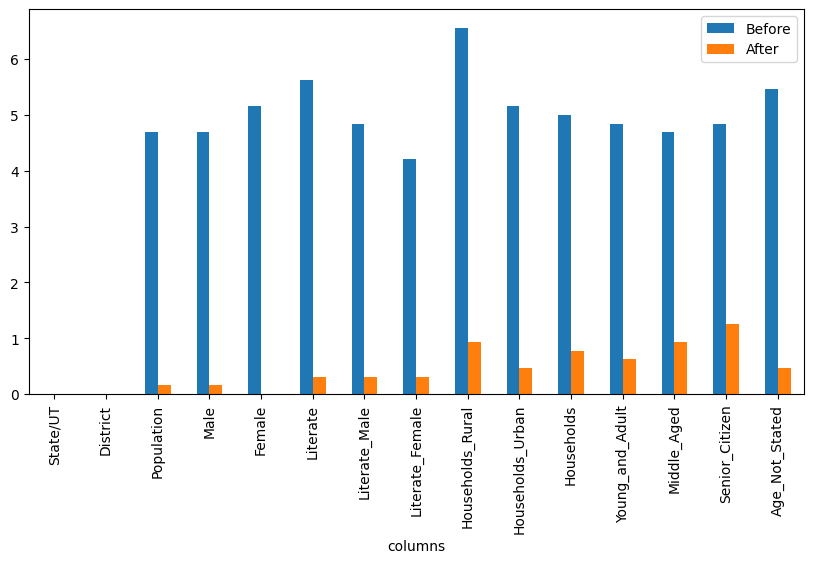

In [26]:
missing_df.plot(x='columns', figsize=(10, 5),kind='bar')


### Problem Statement 6: (Save Data)

In [27]:
df.to_csv('Clean_Data/census.csv')

In [28]:
census=df.copy()

# Extra

In [29]:
census_plot=census.copy()

In [30]:
df=census_plot

In [31]:
# count of female on 1000 male
census_plot['Male_to_Female']=df['Female']*1000/df['Male']

In [32]:
# literate percent
census_plot['Literate_Percent']=df['Literate']*100/df['Population']

In [33]:
# Literate males percent
df['Literate_Male_Percent']=df['Literate_Male']*100/df['Male']

In [34]:
# Literate females percent
df['Literate_Female_Percent']=df['Literate_Female']*100/df['Female']

In [35]:
#Count of Literate Female to 1000 males
df['Literate_Male_to_Female']=df['Literate_Female']*1000/df['Literate_Male']

In [36]:
# Persons in a household
df['People_Per_House']=df['Population']/df['Households']

In [37]:
# young and adult percent of population
df['Young_population']=df['Young_and_Adult']*100/df['Population']

In [38]:
# middle aged
df['Middle_population']=df['Middle_Aged']*100/df['Population']

In [39]:
# senior citizen percent
df['Senior_Citizen_population']=df['Senior_Citizen']*100/df['Population']

In [40]:
census_plot=df.copy()

## Plot District level map of India

In [41]:
df2 = pd.merge(dist, census_plot, on='District', how='left')
gdf = gpd.GeoDataFrame(df2)
gdf = gdf.to_crs(epsg=3857)

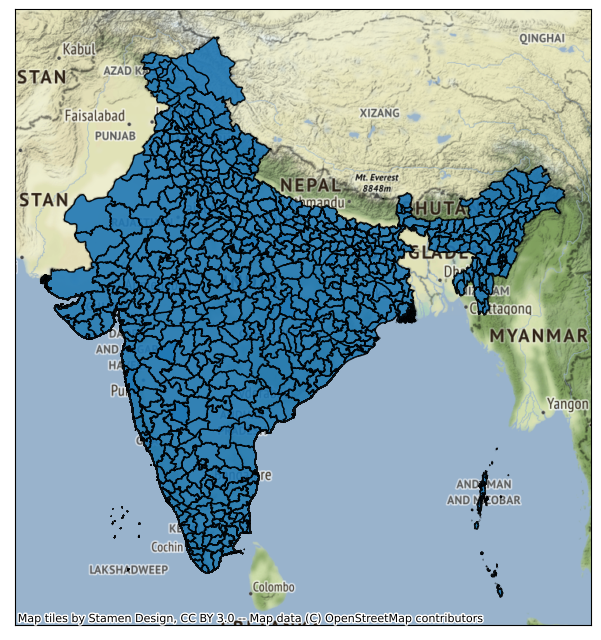

In [43]:
ax = gdf.plot(figsize=(8, 8), alpha=0.9, edgecolor='k')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ctx.add_basemap(ax)

In [44]:
# taken from https://www.kaggle.com/code/sunxyz/visualizing-district-level-2011-indian-census-data
def plot(col="Population"):
    display(Markdown("#### &nbsp;&nbsp;"+col))
    fig, axis = plt.subplots(1, 1, figsize=(8,8))
    divider = make_axes_locatable(axis)
    cax = divider.append_axes("bottom", size="5%", pad=0.1)
    ax = gdf.plot(alpha=0.7,
                  edgecolor='k',
                  cmap="plasma",
                  column=col,
                  legend=True,
                  ax=axis,
                  cax=cax,
                  missing_kwds={'color': 'white'},
                  legend_kwds={'label': "Min: "+str(int(gdf[col].min()))+",   Max: "+str(int(gdf[col].max())),
                               'orientation': "horizontal"})
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ctx.add_basemap(ax)
    plt.show()
    display(Markdown('***'))

#### &nbsp;&nbsp;Population

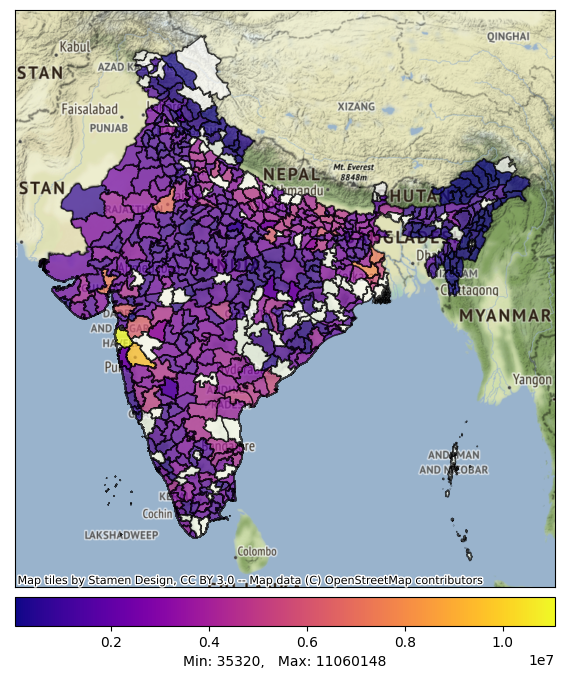

***

In [46]:
plot('Population')

#### &nbsp;&nbsp;Male_to_Female

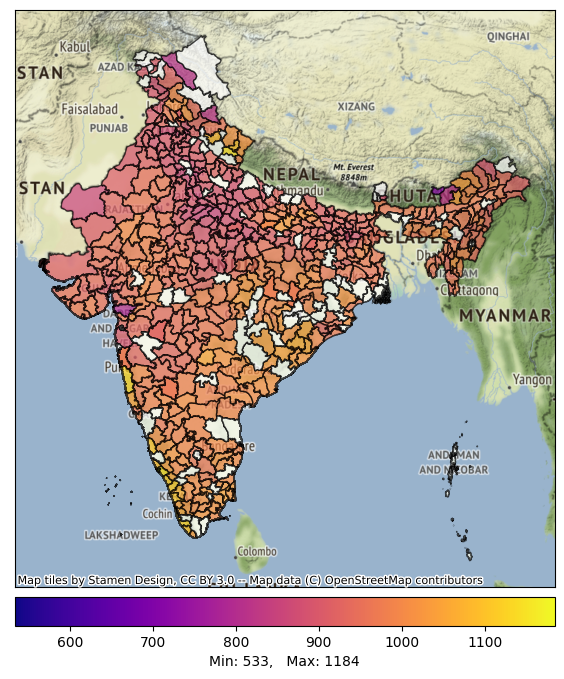

***

In [47]:
plot('Male_to_Female')

#### &nbsp;&nbsp;Literate_Percent

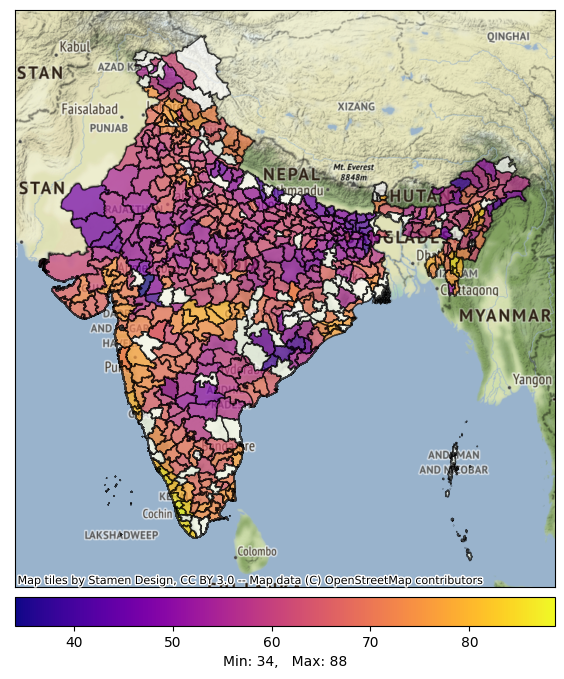

***

In [48]:
plot('Literate_Percent')

#### &nbsp;&nbsp;Literate_Male_Percent

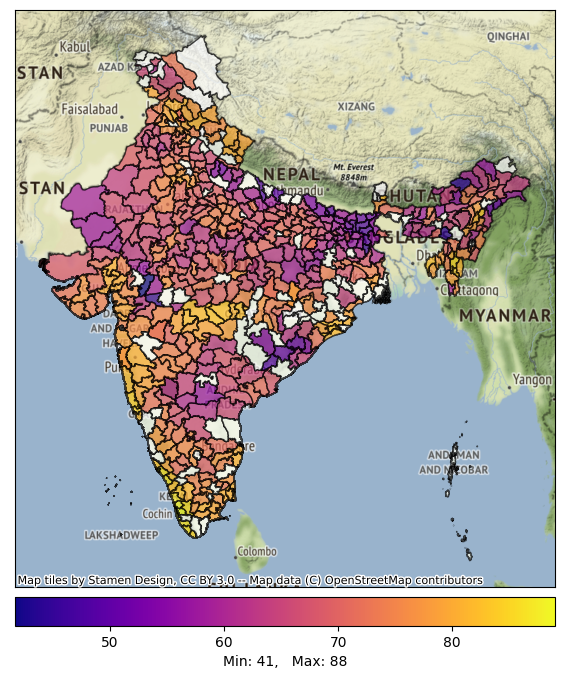

***

In [49]:
plot('Literate_Male_Percent')

#### &nbsp;&nbsp;Literate_Female_Percent

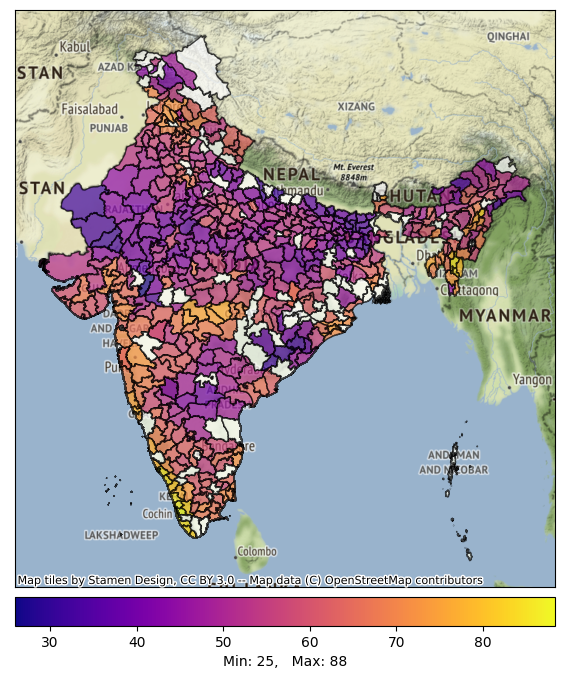

***

In [50]:
plot('Literate_Female_Percent')

#### &nbsp;&nbsp;Literate_Male_to_Female

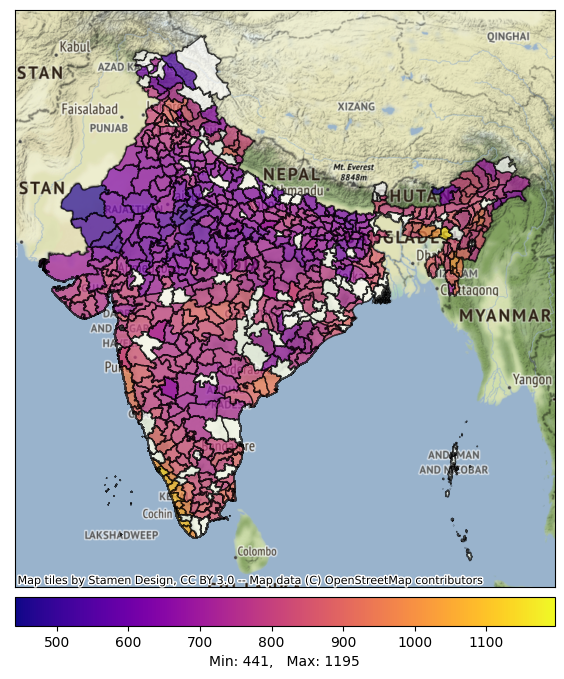

***

In [51]:
plot('Literate_Male_to_Female')

#### &nbsp;&nbsp;People_Per_House

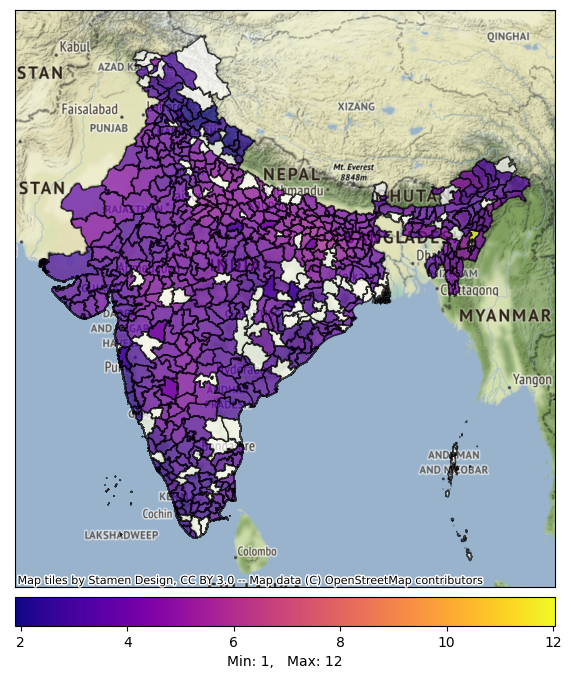

***

In [52]:
plot('People_Per_House')

#### &nbsp;&nbsp;Young_population

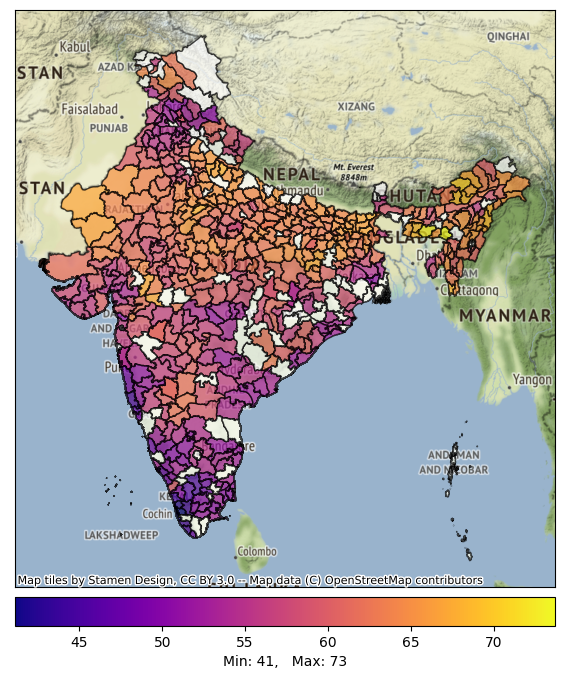

***

In [53]:
plot('Young_population')

#### &nbsp;&nbsp;Middle_population

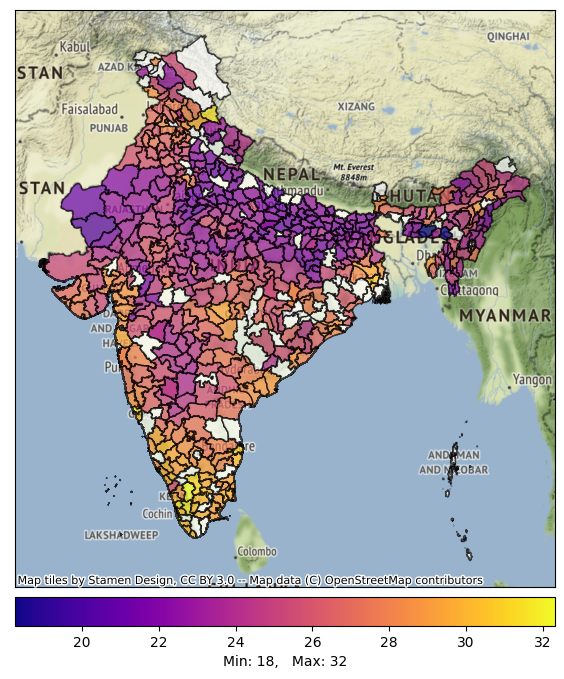

***

In [54]:
plot('Middle_population')

#### &nbsp;&nbsp;Senior_Citizen_population

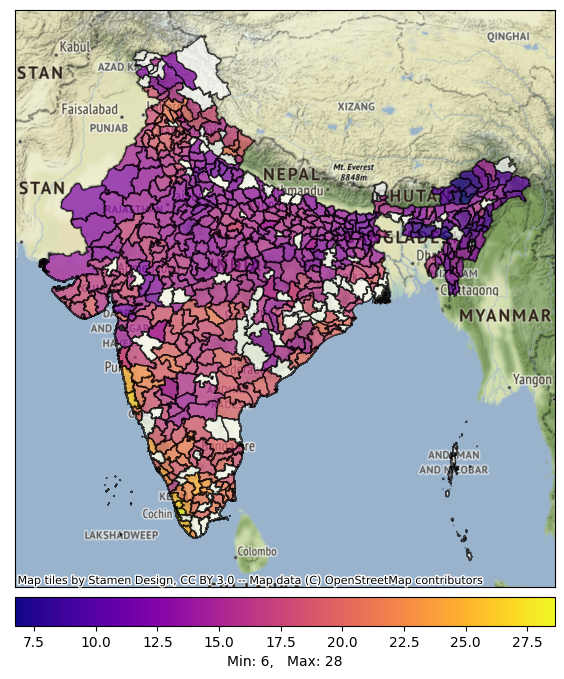

***

In [55]:
plot('Senior_Citizen_population')

### Problem Statement 7: (Process the relevant data)


change all state name usign functions and merge with census on state and district (as some states has same district name)

In [56]:
housing = pd.read_csv('data/housing.csv')

housing.head()


State Code       State Name  District Code District Name  Tehsil Code  \
0           1  JAMMU & KASHMIR              1       Kupwara            0   
1           1  JAMMU & KASHMIR              1       Kupwara            0   
2           1  JAMMU & KASHMIR              1       Kupwara            0   
3           1  JAMMU & KASHMIR              2        Badgam            0   
4           1  JAMMU & KASHMIR              2        Badgam            0   

  Tehsil Name  Town Code/Village code  Ward No           Area Name  \
0     Kupwara                       0        0  District - Kupwara   
1     Kupwara                       0        0  District - Kupwara   
2     Kupwara                       0        0  District - Kupwara   
3      Badgam                       0        0   District - Badgam   
4      Badgam                       0        0   District - Badgam   

  Rural/Urban  ...  Contition_T_Total  Contition_T_Good  Contition_T_Livable  \
0       Rural  ...                100              33.6                 58.1   
1       Total  ...                100              34.8                 57.3   
2       Urban  ...                100              45.7                 49.5   
3       Rural  ...                100              49.7                 46.3   
4       Total  ...                100              51.6                 44.7   

   Contition_T_Dilapidated  Contition_R_Total  Residence_Good  \
0                      8.3               90.9            32.7   
1                      7.9               91.0            33.8   
2                      4.8               91.8            45.0   
3                      3.9               97.2            49.0   
4                      3.8               97.3            50.8   

   Residence_Livable  Residence_Dilapidated  Residence_cum_other  \
0               51.0                    7.2                  9.1   
1               50.2                    6.9                  9.0   
2               42.2                    4.5                  8.2   
3               44.5                    3.7                  2.8   
4               43.0                    3.5                  2.7   

   Residence_cum_Good  
0                 1.0  
1                 0.9  
2                 0.7  
3                 0.7  
4                 0.8  

[5 rows x 156 columns]

In [57]:
housing.columns

Index(['State Code', 'State Name', 'District Code', 'District Name',
       'Tehsil Code', 'Tehsil Name', 'Town Code/Village code', 'Ward No',
       'Area Name', 'Rural/Urban',
       ...
       'Contition_T_Total', 'Contition_T_Good', 'Contition_T_Livable',
       'Contition_T_Dilapidated', 'Contition_R_Total', 'Residence_Good',
       'Residence_Livable', 'Residence_Dilapidated', 'Residence_cum_other',
       'Residence_cum_Good'],
      dtype='object', length=156)

In [58]:
df=housing.copy()
df=df[['State Name','District Name','Rural/Urban','Total Number of households','Total Number of Livable','Total Number of Dilapidated','Latrine_premise']]
df.rename(columns={'State Name':'State/UT','District Name':'District'},inplace=True)

df.head(10)

State/UT     District Rural/Urban  Total Number of households  \
0  JAMMU & KASHMIR      Kupwara       Rural                         100   
1  JAMMU & KASHMIR      Kupwara       Total                         100   
2  JAMMU & KASHMIR      Kupwara       Urban                         100   
3  JAMMU & KASHMIR       Badgam       Rural                         100   
4  JAMMU & KASHMIR       Badgam       Total                         100   
5  JAMMU & KASHMIR       Badgam       Urban                         100   
6  JAMMU & KASHMIR  Leh(Ladakh)       Rural                         100   
7  JAMMU & KASHMIR  Leh(Ladakh)       Total                         100   
8  JAMMU & KASHMIR  Leh(Ladakh)       Urban                         100   
9  JAMMU & KASHMIR       Kargil       Rural                         100   

   Total Number of Livable  Total Number of Dilapidated  Latrine_premise  
0                     58.1                          8.3             48.9  
1                     57.3                          7.9             50.9  
2                     49.5                          4.8             70.2  
3                     46.3                          3.9             83.3  
4                     44.7                          3.8             84.3  
5                     33.8                          2.6             90.4  
6                     51.5                          2.1             88.1  
7                     52.4                          1.8             90.4  
8                     54.6                          1.1             95.8  
9                     73.3                          3.5             96.8

In [59]:
df['State/UT']=df['State/UT'].str.replace('NCT OF DELHI' , 'Delhi')


In [60]:
df['District'].nunique()

634

In [61]:
df['State/UT']=df['State/UT'].str.replace('&','AND')

df['District']=df['District'].str.replace('&','AND')


In [62]:
format_statename(df)
change_state(df)

df.head(10)

State/UT     District Rural/Urban  Total Number of households  \
0  Jammu and Kashmir      Kupwara       Rural                         100   
1  Jammu and Kashmir      Kupwara       Total                         100   
2  Jammu and Kashmir      Kupwara       Urban                         100   
3  Jammu and Kashmir       Badgam       Rural                         100   
4  Jammu and Kashmir       Badgam       Total                         100   
5  Jammu and Kashmir       Badgam       Urban                         100   
6            Laddakh  Leh(Ladakh)       Rural                         100   
7            Laddakh  Leh(Ladakh)       Total                         100   
8            Laddakh  Leh(Ladakh)       Urban                         100   
9            Laddakh       Kargil       Rural                         100   

   Total Number of Livable  Total Number of Dilapidated  Latrine_premise  
0                     58.1                          8.3             48.9  
1                     57.3                          7.9             50.9  
2                     49.5                          4.8             70.2  
3                     46.3                          3.9             83.3  
4                     44.7                          3.8             84.3  
5                     33.8                          2.6             90.4  
6                     51.5                          2.1             88.1  
7                     52.4                          1.8             90.4  
8                     54.6                          1.1             95.8  
9                     73.3                          3.5             96.8

In [63]:
census.loc[census['District']=='Kupwara']

State/UT District  Population      Male    Female  Literate  \
0  Jammu and Kashmir  Kupwara    870354.0  474190.0  396164.0  439654.0   

   Literate_Male  Literate_Female  Households_Rural  Households_Urban  \
0       282823.0         156831.0          158438.0           23226.0   

   Households  Young_and_Adult  Middle_Aged  Senior_Citizen  Age_Not_Stated  
0    181664.0         600759.0     178435.0         89679.0          1481.0

In [64]:
census.groupby('State/UT')['Population'].sum()

State/UT
Andaman and Nicobar Islands       380581.0
Andhra Pradesh                  49386799.0
Arunachal Pradesh                1383727.0
Assam                           31205576.0
Bihar                          104099452.0
Chandigarh                       1055450.0
Chhattisgarh                    25545198.0
Dadra and Nagar Haveli            343709.0
Daman and Diu                     243247.0
Delhi                           16787941.0
Goa                              1458545.0
Gujarat                         60439692.0
Haryana                         25351462.0
Himachal Pradesh                 6864602.0
Jammu and Kashmir               12267013.0
Jharkhand                       32988134.0
Karnataka                       59248274.0
Kerala                          33406061.0
Laddakh                           274289.0
Lakshadweep                        64473.0
Madhya Pradesh                  72626809.0
Maharashtra                    112374333.0
Manipur                          2855794.0
Me

In [65]:
joined_df=pd.merge(df,census[['State/UT','District','Households','Households_Urban','Households_Rural','Population']],
                   on=['State/UT','District'])

In [68]:
joined_df.groupby('State/UT')['Population'].sum()

State/UT
Andaman and Nicobar Islands      1104901.0
Andhra Pradesh                 148160397.0
Arunachal Pradesh                4151181.0
Assam                           93616728.0
Bihar                          312298356.0
Chandigarh                       3166350.0
Chhattisgarh                    76635594.0
Dadra and Nagar Haveli           1031127.0
Daman and Diu                     729741.0
Delhi                           49639499.0
Goa                              4375635.0
Gujarat                        181319076.0
Haryana                         76054386.0
Himachal Pradesh                20478121.0
Jammu and Kashmir               36801039.0
Jharkhand                       98964402.0
Karnataka                      177744822.0
Kerala                         100218183.0
Laddakh                           822867.0
Lakshadweep                       193419.0
Madhya Pradesh                 217880427.0
Maharashtra                    324680626.0
Manipur                          8567382.0
Me

In [69]:
joined_df.head()

State/UT District Rural/Urban  Total Number of households  \
0  Jammu and Kashmir  Kupwara       Rural                         100   
1  Jammu and Kashmir  Kupwara       Total                         100   
2  Jammu and Kashmir  Kupwara       Urban                         100   
3  Jammu and Kashmir   Badgam       Rural                         100   
4  Jammu and Kashmir   Badgam       Total                         100   

   Total Number of Livable  Total Number of Dilapidated  Latrine_premise  \
0                     58.1                          8.3             48.9   
1                     57.3                          7.9             50.9   
2                     49.5                          4.8             70.2   
3                     46.3                          3.9             83.3   
4                     44.7                          3.8             84.3   

   Households  Households_Urban  Households_Rural  Population  
0    181664.0           23226.0          158438.0    870354.0  
1    181664.0           23226.0          158438.0    870354.0  
2    181664.0           23226.0          158438.0    870354.0  
3    187839.0           27190.0          160649.0    753745.0  
4    187839.0           27190.0          160649.0    753745.0

In [78]:
df=joined_df.copy()

In [79]:
joined_df['District'].nunique()

634

In [80]:
df.loc[df['Rural/Urban']=='Rural','Total Number of households']=df['Households_Rural']

In [81]:
df

State/UT                   District Rural/Urban  \
0               Jammu and Kashmir                    Kupwara       Rural   
1               Jammu and Kashmir                    Kupwara       Total   
2               Jammu and Kashmir                    Kupwara       Urban   
3               Jammu and Kashmir                     Badgam       Rural   
4               Jammu and Kashmir                     Badgam       Total   
...                           ...                        ...         ...   
1903  Andaman and Nicobar Islands  North  And Middle Andaman       Total   
1904  Andaman and Nicobar Islands  North  And Middle Andaman       Urban   
1905  Andaman and Nicobar Islands              South Andaman       Rural   
1906  Andaman and Nicobar Islands              South Andaman       Total   
1907  Andaman and Nicobar Islands              South Andaman       Urban   

      Total Number of households  Total Number of Livable  \
0                       158438.0                     58.1   
1                          100.0                     57.3   
2                          100.0                     49.5   
3                       160649.0                     46.3   
4                          100.0                     44.7   
...                          ...                      ...   
1903                       100.0                     44.6   
1904                       100.0                     55.9   
1905                     34901.0                     33.5   
1906                       100.0                     26.4   
1907                       100.0                     21.4   

      Total Number of Dilapidated  Latrine_premise  Households  \
0                             8.3             48.9    181664.0   
1                             7.9             50.9    181664.0   
2                             4.8             70.2    181664.0   
3                             3.9             83.3    187839.0   
4                             3.8             84.3    187839.0   
...                           ...              ...         ...   
1903                          2.8             48.3     40185.0   
1904                          6.6             56.1     40185.0   
1905                          3.5             64.7     85532.0   
1906                          2.2             78.3     85532.0   
1907                          1.2             87.8     85532.0   

      Households_Urban  Households_Rural  Population  
0              23226.0          158438.0    870354.0  
1              23226.0          158438.0    870354.0  
2              23226.0          158438.0    870354.0  
3              27190.0          160649.0    753745.0  
4              27190.0          160649.0    753745.0  
...                ...               ...         ...  
1903            1094.0           39091.0    105597.0  
1904            1094.0           39091.0    105597.0  
1905           50631.0           34901.0    238142.0  
1906           50631.0           34901.0    238142.0  
1907           50631.0           34901.0    238142.0  

[1908 rows x 11 columns]

In [82]:
df.loc[df['Rural/Urban']=='Urban','Total Number of households']=df['Households_Urban']
df.loc[df['Rural/Urban']=='Total','Total Number of households']=df['Households']

In [83]:
df

State/UT                   District Rural/Urban  \
0               Jammu and Kashmir                    Kupwara       Rural   
1               Jammu and Kashmir                    Kupwara       Total   
2               Jammu and Kashmir                    Kupwara       Urban   
3               Jammu and Kashmir                     Badgam       Rural   
4               Jammu and Kashmir                     Badgam       Total   
...                           ...                        ...         ...   
1903  Andaman and Nicobar Islands  North  And Middle Andaman       Total   
1904  Andaman and Nicobar Islands  North  And Middle Andaman       Urban   
1905  Andaman and Nicobar Islands              South Andaman       Rural   
1906  Andaman and Nicobar Islands              South Andaman       Total   
1907  Andaman and Nicobar Islands              South Andaman       Urban   

      Total Number of households  Total Number of Livable  \
0                       158438.0                     58.1   
1                       181664.0                     57.3   
2                        23226.0                     49.5   
3                       160649.0                     46.3   
4                       187839.0                     44.7   
...                          ...                      ...   
1903                     40185.0                     44.6   
1904                      1094.0                     55.9   
1905                     34901.0                     33.5   
1906                     85532.0                     26.4   
1907                     50631.0                     21.4   

      Total Number of Dilapidated  Latrine_premise  Households  \
0                             8.3             48.9    181664.0   
1                             7.9             50.9    181664.0   
2                             4.8             70.2    181664.0   
3                             3.9             83.3    187839.0   
4                             3.8             84.3    187839.0   
...                           ...              ...         ...   
1903                          2.8             48.3     40185.0   
1904                          6.6             56.1     40185.0   
1905                          3.5             64.7     85532.0   
1906                          2.2             78.3     85532.0   
1907                          1.2             87.8     85532.0   

      Households_Urban  Households_Rural  Population  
0              23226.0          158438.0    870354.0  
1              23226.0          158438.0    870354.0  
2              23226.0          158438.0    870354.0  
3              27190.0          160649.0    753745.0  
4              27190.0          160649.0    753745.0  
...                ...               ...         ...  
1903            1094.0           39091.0    105597.0  
1904            1094.0           39091.0    105597.0  
1905           50631.0           34901.0    238142.0  
1906           50631.0           34901.0    238142.0  
1907           50631.0           34901.0    238142.0  

[1908 rows x 11 columns]

In [84]:
df['Total Number of Livable']=(df['Total Number of households']*df['Total Number of Livable'])/100

In [85]:
df

State/UT                   District Rural/Urban  \
0               Jammu and Kashmir                    Kupwara       Rural   
1               Jammu and Kashmir                    Kupwara       Total   
2               Jammu and Kashmir                    Kupwara       Urban   
3               Jammu and Kashmir                     Badgam       Rural   
4               Jammu and Kashmir                     Badgam       Total   
...                           ...                        ...         ...   
1903  Andaman and Nicobar Islands  North  And Middle Andaman       Total   
1904  Andaman and Nicobar Islands  North  And Middle Andaman       Urban   
1905  Andaman and Nicobar Islands              South Andaman       Rural   
1906  Andaman and Nicobar Islands              South Andaman       Total   
1907  Andaman and Nicobar Islands              South Andaman       Urban   

      Total Number of households  Total Number of Livable  \
0                       158438.0                92052.478   
1                       181664.0               104093.472   
2                        23226.0                11496.870   
3                       160649.0                74380.487   
4                       187839.0                83964.033   
...                          ...                      ...   
1903                     40185.0                17922.510   
1904                      1094.0                  611.546   
1905                     34901.0                11691.835   
1906                     85532.0                22580.448   
1907                     50631.0                10835.034   

      Total Number of Dilapidated  Latrine_premise  Households  \
0                             8.3             48.9    181664.0   
1                             7.9             50.9    181664.0   
2                             4.8             70.2    181664.0   
3                             3.9             83.3    187839.0   
4                             3.8             84.3    187839.0   
...                           ...              ...         ...   
1903                          2.8             48.3     40185.0   
1904                          6.6             56.1     40185.0   
1905                          3.5             64.7     85532.0   
1906                          2.2             78.3     85532.0   
1907                          1.2             87.8     85532.0   

      Households_Urban  Households_Rural  Population  
0              23226.0          158438.0    870354.0  
1              23226.0          158438.0    870354.0  
2              23226.0          158438.0    870354.0  
3              27190.0          160649.0    753745.0  
4              27190.0          160649.0    753745.0  
...                ...               ...         ...  
1903            1094.0           39091.0    105597.0  
1904            1094.0           39091.0    105597.0  
1905           50631.0           34901.0    238142.0  
1906           50631.0           34901.0    238142.0  
1907           50631.0           34901.0    238142.0  

[1908 rows x 11 columns]

In [88]:
df['Total Number of Livable'] = np.floor(pd.to_numeric(df['Total Number of Livable'], errors='coerce')).astype('Int64')

# df['Total Number of Livable']=df['Total Number of Livable'].astype('Int64')

In [89]:
df

State/UT                   District Rural/Urban  \
0               Jammu and Kashmir                    Kupwara       Rural   
1               Jammu and Kashmir                    Kupwara       Total   
2               Jammu and Kashmir                    Kupwara       Urban   
3               Jammu and Kashmir                     Badgam       Rural   
4               Jammu and Kashmir                     Badgam       Total   
...                           ...                        ...         ...   
1903  Andaman and Nicobar Islands  North  And Middle Andaman       Total   
1904  Andaman and Nicobar Islands  North  And Middle Andaman       Urban   
1905  Andaman and Nicobar Islands              South Andaman       Rural   
1906  Andaman and Nicobar Islands              South Andaman       Total   
1907  Andaman and Nicobar Islands              South Andaman       Urban   

      Total Number of households  Total Number of Livable  \
0                       158438.0                    92052   
1                       181664.0                   104093   
2                        23226.0                    11496   
3                       160649.0                    74380   
4                       187839.0                    83964   
...                          ...                      ...   
1903                     40185.0                    17922   
1904                      1094.0                      611   
1905                     34901.0                    11691   
1906                     85532.0                    22580   
1907                     50631.0                    10835   

      Total Number of Dilapidated  Latrine_premise  Households  \
0                             8.3             48.9    181664.0   
1                             7.9             50.9    181664.0   
2                             4.8             70.2    181664.0   
3                             3.9             83.3    187839.0   
4                             3.8             84.3    187839.0   
...                           ...              ...         ...   
1903                          2.8             48.3     40185.0   
1904                          6.6             56.1     40185.0   
1905                          3.5             64.7     85532.0   
1906                          2.2             78.3     85532.0   
1907                          1.2             87.8     85532.0   

      Households_Urban  Households_Rural  Population  
0              23226.0          158438.0    870354.0  
1              23226.0          158438.0    870354.0  
2              23226.0          158438.0    870354.0  
3              27190.0          160649.0    753745.0  
4              27190.0          160649.0    753745.0  
...                ...               ...         ...  
1903            1094.0           39091.0    105597.0  
1904            1094.0           39091.0    105597.0  
1905           50631.0           34901.0    238142.0  
1906           50631.0           34901.0    238142.0  
1907           50631.0           34901.0    238142.0  

[1908 rows x 11 columns]

In [90]:
df['Total Number of Dilapidated']=(df['Total Number of households']*df['Total Number of Dilapidated'])/100
df['Latrine_premise']=(df['Total Number of households']*df['Latrine_premise'])/100

In [91]:
df['Total Number of Dilapidated'] = np.floor(pd.to_numeric(df['Total Number of Dilapidated'], errors='coerce')).astype('Int64')
df['Latrine_premise'] = np.floor(pd.to_numeric(df['Latrine_premise'], errors='coerce')).astype('Int64')


In [92]:
df

State/UT                   District Rural/Urban  \
0               Jammu and Kashmir                    Kupwara       Rural   
1               Jammu and Kashmir                    Kupwara       Total   
2               Jammu and Kashmir                    Kupwara       Urban   
3               Jammu and Kashmir                     Badgam       Rural   
4               Jammu and Kashmir                     Badgam       Total   
...                           ...                        ...         ...   
1903  Andaman and Nicobar Islands  North  And Middle Andaman       Total   
1904  Andaman and Nicobar Islands  North  And Middle Andaman       Urban   
1905  Andaman and Nicobar Islands              South Andaman       Rural   
1906  Andaman and Nicobar Islands              South Andaman       Total   
1907  Andaman and Nicobar Islands              South Andaman       Urban   

      Total Number of households  Total Number of Livable  \
0                       158438.0                    92052   
1                       181664.0                   104093   
2                        23226.0                    11496   
3                       160649.0                    74380   
4                       187839.0                    83964   
...                          ...                      ...   
1903                     40185.0                    17922   
1904                      1094.0                      611   
1905                     34901.0                    11691   
1906                     85532.0                    22580   
1907                     50631.0                    10835   

      Total Number of Dilapidated  Latrine_premise  Households  \
0                           13150            77476    181664.0   
1                           14351            92466    181664.0   
2                            1114            16304    181664.0   
3                            6265           133820    187839.0   
4                            7137           158348    187839.0   
...                           ...              ...         ...   
1903                         1125            19409     40185.0   
1904                           72              613     40185.0   
1905                         1221            22580     85532.0   
1906                         1881            66971     85532.0   
1907                          607            44454     85532.0   

      Households_Urban  Households_Rural  Population  
0              23226.0          158438.0    870354.0  
1              23226.0          158438.0    870354.0  
2              23226.0          158438.0    870354.0  
3              27190.0          160649.0    753745.0  
4              27190.0          160649.0    753745.0  
...                ...               ...         ...  
1903            1094.0           39091.0    105597.0  
1904            1094.0           39091.0    105597.0  
1905           50631.0           34901.0    238142.0  
1906           50631.0           34901.0    238142.0  
1907           50631.0           34901.0    238142.0  

[1908 rows x 11 columns]

In [93]:
df.isnull().sum()

State/UT                        0
District                        0
Rural/Urban                     0
Total Number of households     14
Total Number of Livable        14
Total Number of Dilapidated    14
Latrine_premise                14
Households                     15
Households_Urban                9
Households_Rural               18
Population                      3
dtype: int64

In [81]:
df.drop(columns=['Households','Households_Urban','Households_Rural'],axis=1,inplace=True)

In [82]:
df_r=df[df['Rural/Urban']=='Rural'] 

In [83]:
df_r.head()

State/UT     District Rural/Urban  Total Number of households  \
0   Jammu and Kashmir      Kupwara       Rural                    158438.0   
3   Jammu and Kashmir       Badgam       Rural                    160649.0   
6             Laddakh  Leh(Ladakh)       Rural                     36920.0   
9             Laddakh       Kargil       Rural                     40370.0   
12  Jammu and Kashmir        Punch       Rural                    132139.0   

    Total Number of Livable  Total Number of Dilapidated  Latrine_premise  \
0                     92052                        13150            77476   
3                     74380                         6265           133820   
6                     19013                          775            32526   
9                     29591                         1412            39078   
12                    78622                         3171            18103   

    Population  
0     870354.0  
3     753745.0  
6     133487.0  
9     140802.0  
12    476835.0

In [84]:
df_u=df[df['Rural/Urban']=='Urban'] 
df_t=df[df['Rural/Urban']=='Total'] 

In [85]:
df_r.drop(columns=['Rural/Urban'],axis=1,inplace=True)
df_u.drop(columns=['Rural/Urban'],axis=1,inplace=True)
df_t.drop(columns=['Rural/Urban'],axis=1,inplace=True)

C:\Users\miles\AppData\Local\Temp\ipykernel_21588\1300907356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r.drop(columns=['Rural/Urban'],axis=1,inplace=True)
C:\Users\miles\AppData\Local\Temp\ipykernel_21588\1300907356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_u.drop(columns=['Rural/Urban'],axis=1,inplace=True)
C:\Users\miles\AppData\Local\Temp\ipykernel_21588\1300907356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [86]:
# df_t.head(50)

In [87]:
df_r.rename({'Total Number of households':'Households_Rural',
            'Total Number of Livable':'Households_Rural_Livable',
             'Total Number of Dilapidated':'Households_Rural_Dilapidated',
            'Latrine_premise':'Households_Rural_Latrine_premise'},
           axis=1,
           inplace=True)

C:\Users\miles\AppData\Local\Temp\ipykernel_21588\2205376665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r.rename({'Total Number of households':'Households_Rural',


In [88]:
df_r.head(30)

State/UT         District  Households_Rural  \
0   Jammu and Kashmir          Kupwara          158438.0   
3   Jammu and Kashmir           Badgam          160649.0   
6             Laddakh      Leh(Ladakh)           36920.0   
9             Laddakh           Kargil           40370.0   
12  Jammu and Kashmir            Punch          132139.0   
15  Jammu and Kashmir          Rajouri          196070.0   
18  Jammu and Kashmir           Kathua          181374.0   
21  Jammu and Kashmir         Baramula          210543.0   
24  Jammu and Kashmir        Bandipore           80521.0   
27  Jammu and Kashmir         Srinagar            4518.0   
30  Jammu and Kashmir        Ganderbal           63788.0   
33  Jammu and Kashmir          Pulwama          147520.0   
36  Jammu and Kashmir         Shupiyan           75616.0   
39  Jammu and Kashmir         Anantnag          207067.0   
42  Jammu and Kashmir           Kulgam           95952.0   
45  Jammu and Kashmir             Doda          122267.0   
48  Jammu and Kashmir           Ramban           84281.0   
51  Jammu and Kashmir         Kishtwar           72378.0   
54  Jammu and Kashmir         Udhampur          148664.0   
57  Jammu and Kashmir            Reasi           95572.0   
60  Jammu and Kashmir            Jammu          254566.0   
63  Jammu and Kashmir            Samba           94247.0   
66   Himachal Pradesh           Chamba          186395.0   
69   Himachal Pradesh           Kangra          588321.0   
72   Himachal Pradesh  Lahul And Spiti           17434.0   
74   Himachal Pradesh            Kullu          167995.0   
77   Himachal Pradesh            Mandi          431129.0   
80   Himachal Pradesh         Hamirpur          196116.0   
83   Himachal Pradesh              Una          185091.0   
86   Himachal Pradesh         Bilaspur          152458.0   

    Households_Rural_Livable  Households_Rural_Dilapidated  \
0                      92052                         13150   
3                      74380                          6265   
6                      19013                           775   
9                      29591                          1412   
12                     78622                          3171   
15                    103721                          5293   
18                     66564                          6348   
21                     97060                         11158   
24                     43239                          5958   
27                      1734                           284   
30                     30235                          6059   
33                     63433                          6785   
36                     25104                          4461   
39                     89660                         10560   
42                     47016                          4509   
45                     73360                          1956   
48                     43404                          1769   
51                     37636                          2460   
54                     66452                          2973   
57                     52469                          1433   
60                     97753                         12473   
63                     28745                          3110   
66                     70830                          4287   
69                    148845                          8236   
72                      5875                           139   
74                     46198                          2015   
77                    120716                          6898   
80                     42361                          1961   
83                     46828                          2591   
86                     41011                          1981   

    Households_Rural_Latrine_premise  Population  
0                              77476    870354.0  
3                             133820    753745.0  
6                              32526    133487.0  
9                        

In [89]:
df_u.rename({'Total Number of households':'Households_Urban',
            'Total Number of Livable':'Households_Urban_Livable',
             'Total Number of Dilapidated':'Households_Urban_Dilapidated',
            'Latrine_premise':'Households_Urban_Latrine_premise'},
           axis=1,
           inplace=True)

df_t.rename({'Total Number of households':'Households',
            'Total Number of Livable':'Livable',
             'Total Number of Dilapidated':'Dilapidated'},
           axis=1,
           inplace=True)

C:\Users\miles\AppData\Local\Temp\ipykernel_21588\3840200536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_u.rename({'Total Number of households':'Households_Urban',
C:\Users\miles\AppData\Local\Temp\ipykernel_21588\3840200536.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t.rename({'Total Number of households':'Households',


In [90]:
joined=pd.merge(df_r,df_u,on =['State/UT',"District"],how='outer')

In [91]:
# joined=pd.merge(joined,df_t,on ="District Name",how='inner')

In [92]:
joined

State/UT     District  Households_Rural  \
0    Jammu and Kashmir      Kupwara          158438.0   
1    Jammu and Kashmir       Badgam          160649.0   
2              Laddakh  Leh(Ladakh)           36920.0   
3              Laddakh       Kargil           40370.0   
4    Jammu and Kashmir        Punch          132139.0   
..                 ...          ...               ...   
635        Maharashtra       Mumbai               NaN   
636          Telangana    Hyderabad               NaN   
637         Tamil Nadu      Chennai               NaN   
638         Puducherry        Yanam               NaN   
639         Puducherry         Mahe               NaN   

     Households_Rural_Livable  Households_Rural_Dilapidated  \
0                       92052                         13150   
1                       74380                          6265   
2                       19013                           775   
3                       29591                          1412   
4                       78622                          3171   
..                        ...                           ...   
635                      <NA>                          <NA>   
636                      <NA>                          <NA>   
637                      <NA>                          <NA>   
638                      <NA>                          <NA>   
639                      <NA>                          <NA>   

     Households_Rural_Latrine_premise  Population_x  Households_Urban  \
0                               77476      870354.0           23226.0   
1                              133820      753745.0           27190.0   
2                               32526      133487.0           17474.0   
3                               39078      140802.0            7774.0   
4                               18103      476835.0           15269.0   
..                                ...           ...               ...   
635                              <NA>           NaN         1107321.0   
636                              <NA>           NaN         1066289.0   
637                              <NA>           NaN         1314125.0   
638                              <NA>           NaN           15519.0   
639                              <NA>           NaN           12110.0   

     Households_Urban_Livable  Households_Urban_Dilapidated  \
0                       11496                          1114   
1                        9190                           706   
2                        9540                           192   
3                        5348                            93   
4                        4168                           122   
..                        ...                           ...   
635                    290118                         16609   
636                    203661                          9596   
637                    228657                         11827   
638                      2389                           108   
639                      1913                           133   

     Households_Urban_Latrine_premise  Population_y  
0                               16304      870354.0  
1                               24579      753745.0  
2                               16740      133487.0  
3                                7579      140802.0  
4                               11497      476835.0  
..                                ...           ...  
635                            741905     3085411.0  
636                           1050294     3943323.0  
637                           1256303     4646732.0  
638                             12710       55626.0  
639                             11843       41816.0  

[640 rows x 12 columns]

In [93]:
# joined=joined[['District','Households_Rural','Households_Rural_Livable','Households_Rural_Dilapidated','Households_Rural_Latrine_premise',
#               'Households_Urban','Households_Urban_Livable','Households_Urban_Dilapidated','Households_Urban_Latrine_premise']]

In [94]:
joined.to_csv('Clean_Data/housing.csv')

In [95]:
housing=joined.copy()

### Problem Statement 8: (Visualise the housing data)

##### Visualize the following data for each state using appropriate methods:
<br>     Number of households for 100 people
<br>     Percentage of households that have toilet(s) in premise to the total number of households.
<br>     Urban to rural population ratio.


In [96]:
# for 1 we just need census data
# for 2 and 3 we need housing data as well

In [97]:
# so just start with census data
df=census.copy()

In [98]:
df=df[['State/UT','District','Population','Households']]

In [99]:
df.head()

State/UT     District  Population  Households
0  Jammu and Kashmir      Kupwara    870354.0    181664.0
1  Jammu and Kashmir       Badgam    753745.0    187839.0
2            Laddakh  Leh(Ladakh)    133487.0     54394.0
3            Laddakh       Kargil    140802.0     48144.0
4  Jammu and Kashmir        Punch    476835.0    147408.0

In [100]:
df1=df.groupby('State/UT')['Population','Households'].sum()
df1['State/UT']=df1.index
df1['Household_per100']=df1['Households']*100/df1['Population']

C:\Users\miles\AppData\Local\Temp\ipykernel_21588\2186181443.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1=df.groupby('State/UT')['Population','Households'].sum()


In [101]:
df1

Population  Households  \
State/UT                                               
Andaman and Nicobar Islands     380581.0    141675.0   
Andhra Pradesh                49386799.0  14212527.0   
Arunachal Pradesh              1383727.0    351765.0   
Assam                         31205576.0   9074503.0   
Bihar                        104099452.0  23414674.0   
Chandigarh                     1055450.0    298367.0   
Chhattisgarh                  25545198.0   5982534.0   
Dadra and Nagar Haveli          343709.0    108783.0   
Daman and Diu                   243247.0     89929.0   
Delhi                         16787941.0   4605555.0   
Goa                            1458545.0    576582.0   
Gujarat                       60439692.0  17524030.0   
Haryana                       25351462.0   7088008.0   
Himachal Pradesh               6864602.0   2933663.0   
Jammu and Kashmir             12267013.0   3501094.0   
Jharkhand                     32988134.0   7796033.0   
Karnataka                     59248274.0  17999066.0   
Kerala                        33406061.0  11217853.0   
Laddakh                         274289.0    102538.0   
Lakshadweep                      64473.0     21242.0   
Madhya Pradesh                72626809.0  18498763.0   
Maharashtra                  112374333.0  33569762.0   
Manipur                        2855794.0    609964.0   
Meghalaya                      2966889.0    721467.0   
Mizoram                        1097206.0    269431.0   
Nagaland                       1978502.0    534424.0   
Odisha                        41974218.0  12759133.0   
Puducherry                     1247953.0    387999.0   
Punjab                        27743338.0   7847447.0   
Rajasthan                     68548437.0  17461829.0   
Sikkim                          610577.0    169022.0   
Tamil Nadu                    72147030.0  23166721.0   
Telangana                     35193978.0  10078599.0   
Tripura                        3673917.0   1066863.0   
Uttar Pradesh                199812341.0  45172443.0   
Uttarakhand                   10086292.0   3383410.0   
West Bengal                   91276115.0  25343715.0   

                                                State/UT  Household_per100  
State/UT                                                                    
Andaman and Nicobar Islands  Andaman and Nicobar Islands         37.225978  
Andhra Pradesh                            Andhra Pradesh         28.777988  
Arunachal Pradesh                      Arunachal Pradesh         25.421561  
Assam                                              Assam         29.079748  
Bihar                                              Bihar         22.492601  
Chandigarh                                    Chandigarh         28.269174  
Chhattisgarh                                Chhattisgarh         23.419407  
Dadra and Nagar Haveli            Dadra and Nagar Haveli         31.649739  
Daman and Diu                              Daman and Diu         36.970240  
Delhi                                              Delhi         27.433710  
Goa                                                  Goa         39.531314  
Gujarat                                          Gujarat         28.994241  
Haryana                                          Haryana         27.958971  
Himachal Pradesh                        Himachal Pradesh         42.736097  
Jammu and Kashmir                      Jammu and Kashmir         28.540721  
Jharkhand                                      Jharkhand         23.632840  
Karnataka                                      Karnataka         30.379055  
Kerala                                            Kerala         33.580293  
Laddakh                                          Laddakh         37.383198  
Lakshadweep                                  Lakshadweep         32.947125  
Madhya Pradesh                            Madhya Pradesh         25.470984  
Maharashtra                                  Maharashtra         29.873158

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'Himachal Pradesh'),
  Text(1, 0, 'Goa'),
  Text(2, 0, 'Laddakh'),
  Text(3, 0, 'Andaman and Nicobar Islands'),
  Text(4, 0, 'Daman and Diu'),
  Text(5, 0, 'Kerala'),
  Text(6, 0, 'Uttarakhand'),
  Text(7, 0, 'Lakshadweep'),
  Text(8, 0, 'Tamil Nadu'),
  Text(9, 0, 'Dadra and Nagar Haveli'),
  Text(10, 0, 'Puducherry'),
  Text(11, 0, 'Odisha'),
  Text(12, 0, 'Karnataka'),
  Text(13, 0, 'Maharashtra'),
  Text(14, 0, 'Assam'),
  Text(15, 0, 'Tripura'),
  Text(16, 0, 'Gujarat'),
  Text(17, 0, 'Andhra Pradesh'),
  Text(18, 0, 'Telangana'),
  Text(19, 0, 'Jammu and Kashmir'),
  Text(20, 0, 'Punjab'),
  Text(21, 0, 'Chandigarh'),
  Text(22, 0, 'Haryana'),
  Text(23, 0, 'West Bengal'),
  Text(24, 0, 'Sikkim'),
  Text(25, 0, 'Delhi'),
  Text(26, 0, 'Nagaland'),
  Text(27, 0, 'Rajasthan'),
  Text(28, 0, 'Madhya

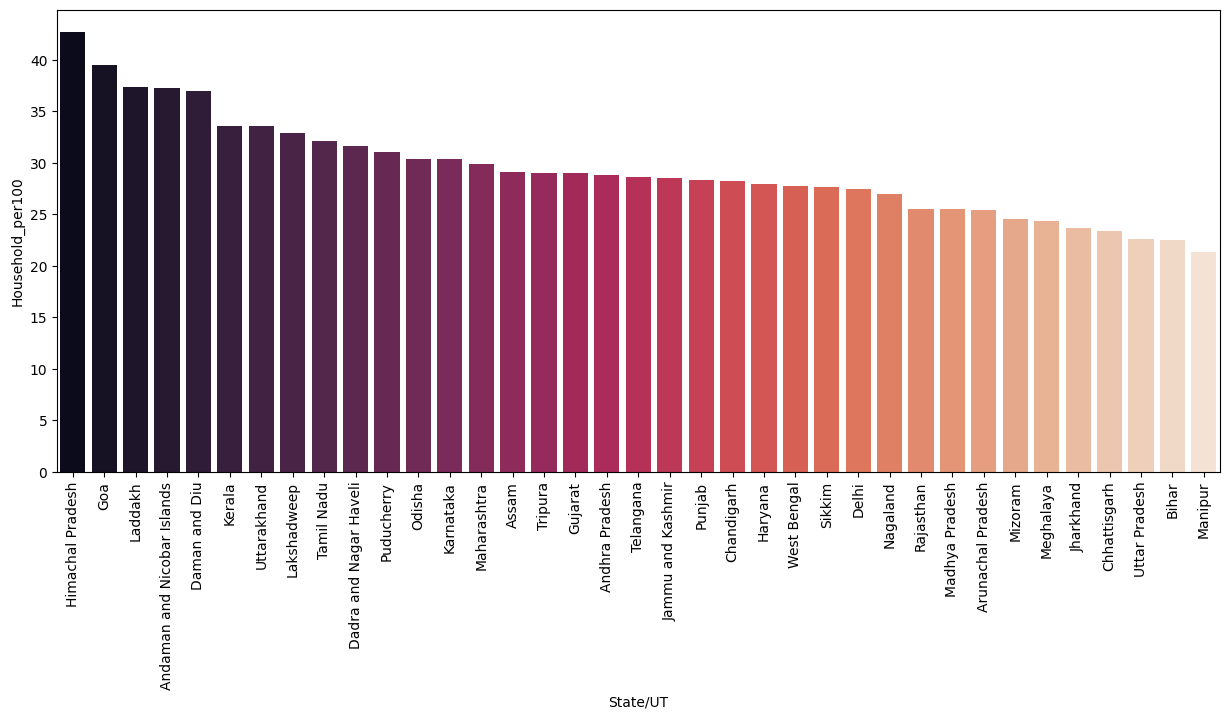

In [102]:
plt.figure(figsize=(15,6))
sns.barplot(data=df1,x='State/UT',y='Household_per100',order=df1['Household_per100'].sort_values(ascending=False).index,
            palette='rocket')
plt.xticks(rotation=90)

In [103]:
# now start with 2nd
# take df_t will work fine (it was no use in last que but in this it is very helpfull)

In [104]:
df_t #df total

State/UT                   District  Households  \
1               Jammu and Kashmir                    Kupwara    181664.0   
4               Jammu and Kashmir                     Badgam    187839.0   
7                         Laddakh                Leh(Ladakh)     54394.0   
10                        Laddakh                     Kargil     48144.0   
13              Jammu and Kashmir                      Punch    147408.0   
...                           ...                        ...         ...   
1895                   Puducherry                       Mahe     12110.0   
1898                   Puducherry                   Karaikal     69333.0   
1901  Andaman and Nicobar Islands                   Nicobars     15958.0   
1903  Andaman and Nicobar Islands  North  And Middle Andaman     40185.0   
1906  Andaman and Nicobar Islands              South Andaman     85532.0   

      Livable  Dilapidated  Latrine_premise  Population  
1      104093        14351            92466    870354.0  
4       83964         7137           158348    753745.0  
7       28502          979            49172    133487.0  
10      34952         1540            46651    140802.0  
13      83875         3390            27565    476835.0  
...       ...          ...              ...         ...  
1895     1913          133            11843     41816.0  
1898    20245         1109            42015    200222.0  
1901     3798          191            12910     36842.0  
1903    17922         1125            19409    105597.0  
1906    22580         1881            66971    238142.0  

[640 rows x 7 columns]

In [105]:
df2=df_t.groupby('State/UT')['Households','Latrine_premise'].sum()

C:\Users\miles\AppData\Local\Temp\ipykernel_21588\2524374559.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2=df_t.groupby('State/UT')['Households','Latrine_premise'].sum()


In [106]:
df2['State/UT']=df2.index
df2

Households  Latrine_premise  \
State/UT                                                   
Andaman and Nicobar Islands    141675.0            99290   
Andhra Pradesh               14212527.0          6844196   
Arunachal Pradesh              351765.0           222557   
Assam                         9074503.0          5864553   
Bihar                        23414674.0          5383537   
Chandigarh                     298367.0           261369   
Chhattisgarh                  5982534.0          1499816   
Dadra and Nagar Haveli         108783.0            59504   
Daman and Diu                   89929.0            69652   
Delhi                         4605555.0          4117494   
Goa                            576582.0           459554   
Gujarat                      17524030.0         10177027   
Haryana                       7088008.0          4859199   
Himachal Pradesh              2933663.0          2034848   
Jammu and Kashmir             3501094.0          1752458   
Jharkhand                     7796033.0          1751356   
Karnataka                    17999066.0          9348024   
Kerala                       11217853.0         10682026   
Laddakh                        102538.0            95823   
Lakshadweep                     21242.0            20774   
Madhya Pradesh               18498763.0          5395825   
Maharashtra                  33569762.0         18170845   
Manipur                        609964.0           539981   
Meghalaya                      721467.0           453908   
Mizoram                        269431.0           248006   
Nagaland                       534424.0           411230   
Odisha                       12759133.0          2833759   
Puducherry                     387999.0           265928   
Punjab                        7847447.0          6217702   
Rajasthan                    17461829.0          6327149   
Sikkim                         169022.0           147330   
Tamil Nadu                   23166721.0         11131271   
Telangana                    10078599.0          5309186   
Tripura                       1066863.0           918012   
Uttar Pradesh                45172443.0         16185165   
Uttarakhand                   3383410.0          2182125   
West Bengal                  25343715.0         14985934   

                                                State/UT  
State/UT                                                  
Andaman and Nicobar Islands  Andaman and Nicobar Islands  
Andhra Pradesh                            Andhra Pradesh  
Arunachal Pradesh                      Arunachal Pradesh  
Assam                                              Assam  
Bihar                                              Bihar  
Chandigarh                                    Chandigarh  
Chhattisgarh                                Chhattisgarh  
Dadra and Nagar Haveli            Dadra and Nagar Haveli  
Daman and Diu                              Daman and Diu  
Delhi                                              Delhi  
Goa                                                  Goa  
Gujarat                                          Gujarat  
Haryana                                          Haryana  
Himachal Pradesh                        Himachal Pradesh  
Jammu and Kashmir                      Jammu and Kashmir  
Jharkhand                                      Jharkhand  
Karnataka                                      Karnataka  
Kerala                                            Kerala  
Laddakh                                          Laddakh  
Lakshadweep                                  Lakshadweep  
Madhya Pradesh                            Madhya Pradesh  
Maharashtra                                  Maharashtra  
Manipur                                          Manipur  
Meghalaya                                      Meghalaya  
Mizoram                                          Mizoram  
Nagaland                                        Nagaland  
Odisha                              

In [107]:
df2['Percent_latrine']=df2['Latrine_premise']*100/df2['Households']

In [108]:
df2

Households  Latrine_premise  \
State/UT                                                   
Andaman and Nicobar Islands    141675.0            99290   
Andhra Pradesh               14212527.0          6844196   
Arunachal Pradesh              351765.0           222557   
Assam                         9074503.0          5864553   
Bihar                        23414674.0          5383537   
Chandigarh                     298367.0           261369   
Chhattisgarh                  5982534.0          1499816   
Dadra and Nagar Haveli         108783.0            59504   
Daman and Diu                   89929.0            69652   
Delhi                         4605555.0          4117494   
Goa                            576582.0           459554   
Gujarat                      17524030.0         10177027   
Haryana                       7088008.0          4859199   
Himachal Pradesh              2933663.0          2034848   
Jammu and Kashmir             3501094.0          1752458   
Jharkhand                     7796033.0          1751356   
Karnataka                    17999066.0          9348024   
Kerala                       11217853.0         10682026   
Laddakh                        102538.0            95823   
Lakshadweep                     21242.0            20774   
Madhya Pradesh               18498763.0          5395825   
Maharashtra                  33569762.0         18170845   
Manipur                        609964.0           539981   
Meghalaya                      721467.0           453908   
Mizoram                        269431.0           248006   
Nagaland                       534424.0           411230   
Odisha                       12759133.0          2833759   
Puducherry                     387999.0           265928   
Punjab                        7847447.0          6217702   
Rajasthan                    17461829.0          6327149   
Sikkim                         169022.0           147330   
Tamil Nadu                   23166721.0         11131271   
Telangana                    10078599.0          5309186   
Tripura                       1066863.0           918012   
Uttar Pradesh                45172443.0         16185165   
Uttarakhand                   3383410.0          2182125   
West Bengal                  25343715.0         14985934   

                                                State/UT  Percent_latrine  
State/UT                                                                   
Andaman and Nicobar Islands  Andaman and Nicobar Islands        70.082936  
Andhra Pradesh                            Andhra Pradesh        48.156081  
Arunachal Pradesh                      Arunachal Pradesh        63.268659  
Assam                                              Assam        64.626713  
Bihar                                              Bihar         22.99215  
Chandigarh                                    Chandigarh        87.599835  
Chhattisgarh                                Chhattisgarh        25.069912  
Dadra and Nagar Haveli            Dadra and Nagar Haveli        54.699723  
Daman and Diu                              Daman and Diu        77.452212  
Delhi                                              Delhi        89.402776  
Goa                                                  Goa        79.703147  
Gujarat                                          Gujarat        58.074695  
Haryana                                          Haryana        68.555213  
Himachal Pradesh                        Himachal Pradesh        69.362023  
Jammu and Kashmir                      Jammu and Kashmir        50.054583  
Jharkhand                                      Jharkhand        22.464707  
Karnataka                                      Karnataka        51.936162  
Kerala                                            Kerala        95.223444  
Laddakh                                          Laddakh        93.451208  
Lakshadweep                                  Lakshadweep        97.796818  
Madhya Pradesh  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'Lakshadweep'),
  Text(1, 0, 'Kerala'),
  Text(2, 0, 'Laddakh'),
  Text(3, 0, 'Mizoram'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Manipur'),
  Text(6, 0, 'Chandigarh'),
  Text(7, 0, 'Sikkim'),
  Text(8, 0, 'Tripura'),
  Text(9, 0, 'Goa'),
  Text(10, 0, 'Punjab'),
  Text(11, 0, 'Daman and Diu'),
  Text(12, 0, 'Nagaland'),
  Text(13, 0, 'Andaman and Nicobar Islands'),
  Text(14, 0, 'Himachal Pradesh'),
  Text(15, 0, 'Haryana'),
  Text(16, 0, 'Puducherry'),
  Text(17, 0, 'Assam'),
  Text(18, 0, 'Uttarakhand'),
  Text(19, 0, 'Arunachal Pradesh'),
  Text(20, 0, 'Meghalaya'),
  Text(21, 0, 'West Bengal'),
  Text(22, 0, 'Gujarat'),
  Text(23, 0, 'Dadra and Nagar Haveli'),
  Text(24, 0, 'Maharashtra'),
  Text(25, 0, 'Telangana'),
  Text(26, 0, 'Karnataka'),
  Text(27, 0, 'Jammu and Kashmir'),
  Text(28, 0, 'Andhr

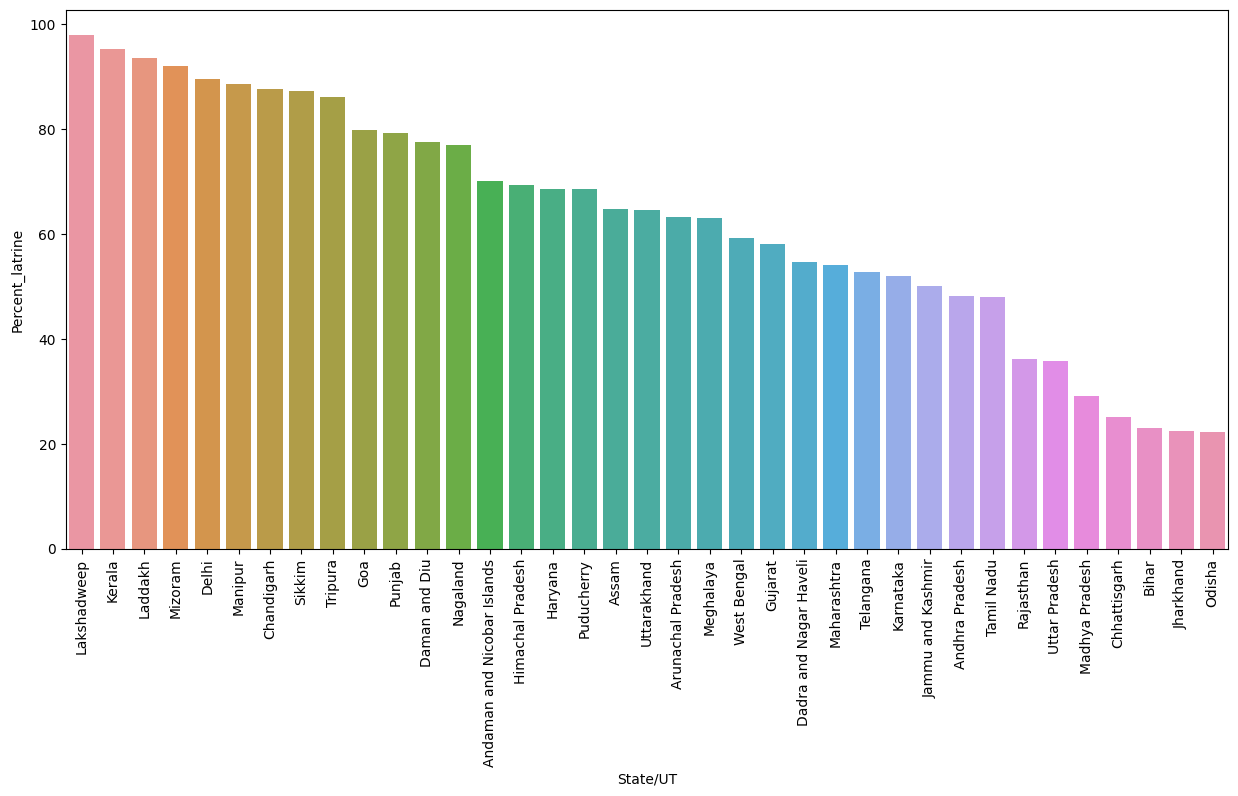

In [110]:
plt.figure(figsize=(15,7))
sns.barplot(data=df2,x='State/UT',y='Percent_latrine',order=df2['Percent_latrine'].sort_values(ascending=False).index)
plt.xticks(rotation=90)

In [94]:
## now go to 3rd que -->  urban to rural population ratio
# and urban , rural population data is missing

In [112]:
df3=housing.copy()

In [113]:
df3

State/UT     District  Households_Rural  \
0    Jammu and Kashmir      Kupwara          158438.0   
1    Jammu and Kashmir       Badgam          160649.0   
2              Laddakh  Leh(Ladakh)           36920.0   
3              Laddakh       Kargil           40370.0   
4    Jammu and Kashmir        Punch          132139.0   
..                 ...          ...               ...   
635        Maharashtra       Mumbai               NaN   
636          Telangana    Hyderabad               NaN   
637         Tamil Nadu      Chennai               NaN   
638         Puducherry        Yanam               NaN   
639         Puducherry         Mahe               NaN   

     Households_Rural_Livable  Households_Rural_Dilapidated  \
0                       92052                         13150   
1                       74380                          6265   
2                       19013                           775   
3                       29591                          1412   
4                       78622                          3171   
..                        ...                           ...   
635                      <NA>                          <NA>   
636                      <NA>                          <NA>   
637                      <NA>                          <NA>   
638                      <NA>                          <NA>   
639                      <NA>                          <NA>   

     Households_Rural_Latrine_premise  Population_x  Households_Urban  \
0                               77476      870354.0           23226.0   
1                              133820      753745.0           27190.0   
2                               32526      133487.0           17474.0   
3                               39078      140802.0            7774.0   
4                               18103      476835.0           15269.0   
..                                ...           ...               ...   
635                              <NA>           NaN         1107321.0   
636                              <NA>           NaN         1066289.0   
637                              <NA>           NaN         1314125.0   
638                              <NA>           NaN           15519.0   
639                              <NA>           NaN           12110.0   

     Households_Urban_Livable  Households_Urban_Dilapidated  \
0                       11496                          1114   
1                        9190                           706   
2                        9540                           192   
3                        5348                            93   
4                        4168                           122   
..                        ...                           ...   
635                    290118                         16609   
636                    203661                          9596   
637                    228657                         11827   
638                      2389                           108   
639                      1913                           133   

     Households_Urban_Latrine_premise  Population_y  
0                               16304      870354.0  
1                               24579      753745.0  
2                               16740      133487.0  
3                                7579      140802.0  
4                               11497      476835.0  
..                                ...           ...  
635                            741905     3085411.0  
636                           1050294     3943323.0  
637                           1256303     4646732.0  
638                             12710       55626.0  
639                             11843       41816.0  

[640 rows x 12 columns]

### Problem Statement 9: (Inconsistency in different datasets)

After the updates, the “Households_Rural” and “Households_Urban” data are redundant in both housing and census data. Compare the two data and see if there is a major difference between the values in the two files. A difference of more than 10% can be considered a major difference. Report the names of the districts where a major difference is found in the data.

In [114]:
df_c=census[['State/UT','District','Households_Rural','Households_Urban']]
df_h=housing[['State/UT','District','Households_Rural','Households_Urban']]

In [115]:
df_c.rename({'Households_Rural':'Households_Rural_C',
            'Households_Urban':'Households_Urban_C'},inplace=True,axis=1)

C:\Users\miles\AppData\Local\Temp\ipykernel_21588\3615833547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c.rename({'Households_Rural':'Households_Rural_C',


In [116]:
df_c

State/UT                   District  \
0              Jammu and Kashmir                    Kupwara   
1              Jammu and Kashmir                     Badgam   
2                        Laddakh                Leh(Ladakh)   
3                        Laddakh                     Kargil   
4              Jammu and Kashmir                      Punch   
..                           ...                        ...   
635                   Puducherry                       Mahe   
636                   Puducherry                   Karaikal   
637  Andaman and Nicobar Islands                   Nicobars   
638  Andaman and Nicobar Islands  North  And Middle Andaman   
639  Andaman and Nicobar Islands              South Andaman   

     Households_Rural_C  Households_Urban_C  
0              158438.0             23226.0  
1              160649.0             27190.0  
2               36920.0             17474.0  
3               40370.0              7774.0  
4              132139.0             15269.0  
..                  ...                 ...  
635                 0.0             12110.0  
636             35618.0             33715.0  
637             15958.0                 0.0  
638             39091.0              1094.0  
639             34901.0             50631.0  

[640 rows x 4 columns]

In [117]:
df_h.rename({'Households_Rural':'Households_Rural_H',
            'Households_Urban':'Households_Urban_H'},inplace=True,axis=1)

C:\Users\miles\AppData\Local\Temp\ipykernel_21588\2445751507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h.rename({'Households_Rural':'Households_Rural_H',


In [118]:
df_h

State/UT     District  Households_Rural_H  Households_Urban_H
0    Jammu and Kashmir      Kupwara            158438.0             23226.0
1    Jammu and Kashmir       Badgam            160649.0             27190.0
2              Laddakh  Leh(Ladakh)             36920.0             17474.0
3              Laddakh       Kargil             40370.0              7774.0
4    Jammu and Kashmir        Punch            132139.0             15269.0
..                 ...          ...                 ...                 ...
635        Maharashtra       Mumbai                 NaN           1107321.0
636          Telangana    Hyderabad                 NaN           1066289.0
637         Tamil Nadu      Chennai                 NaN           1314125.0
638         Puducherry        Yanam                 NaN             15519.0
639         Puducherry         Mahe                 NaN             12110.0

[640 rows x 4 columns]

In [119]:
joined=pd.merge(df_c,df_h,on =['State/UT','District'])

In [120]:
joined.head()

State/UT     District  Households_Rural_C  Households_Urban_C  \
0  Jammu and Kashmir      Kupwara            158438.0             23226.0   
1  Jammu and Kashmir       Badgam            160649.0             27190.0   
2            Laddakh  Leh(Ladakh)             36920.0             17474.0   
3            Laddakh       Kargil             40370.0              7774.0   
4  Jammu and Kashmir        Punch            132139.0             15269.0   

   Households_Rural_H  Households_Urban_H  
0            158438.0             23226.0  
1            160649.0             27190.0  
2             36920.0             17474.0  
3             40370.0              7774.0  
4            132139.0             15269.0

In [121]:
joined['Difference_Rural']=joined['Households_Rural_C']-joined['Households_Rural_H']
joined['Difference_Urban']=joined['Households_Urban_C']-joined['Households_Urban_H']

In [122]:
joined

State/UT                   District  \
0              Jammu and Kashmir                    Kupwara   
1              Jammu and Kashmir                     Badgam   
2                        Laddakh                Leh(Ladakh)   
3                        Laddakh                     Kargil   
4              Jammu and Kashmir                      Punch   
..                           ...                        ...   
635                   Puducherry                       Mahe   
636                   Puducherry                   Karaikal   
637  Andaman and Nicobar Islands                   Nicobars   
638  Andaman and Nicobar Islands  North  And Middle Andaman   
639  Andaman and Nicobar Islands              South Andaman   

     Households_Rural_C  Households_Urban_C  Households_Rural_H  \
0              158438.0             23226.0            158438.0   
1              160649.0             27190.0            160649.0   
2               36920.0             17474.0             36920.0   
3               40370.0              7774.0             40370.0   
4              132139.0             15269.0            132139.0   
..                  ...                 ...                 ...   
635                 0.0             12110.0                 NaN   
636             35618.0             33715.0             35618.0   
637             15958.0                 0.0             15958.0   
638             39091.0              1094.0             39091.0   
639             34901.0             50631.0             34901.0   

     Households_Urban_H  Difference_Rural  Difference_Urban  
0               23226.0               0.0               0.0  
1               27190.0               0.0               0.0  
2               17474.0               0.0               0.0  
3                7774.0               0.0               0.0  
4               15269.0               0.0               0.0  
..                  ...               ...               ...  
635             12110.0               NaN               0.0  
636             33715.0               0.0               0.0  
637                 NaN               0.0               NaN  
638              1094.0               0.0               0.0  
639             50631.0               0.0               0.0  

[640 rows x 8 columns]

In [123]:
joined['Difference_Rural'].nunique()

1

In [124]:
joined['Difference_Urban'].nunique()

1

## Observations:
    There is no difference between Households_Rural from 'census' and 'housing'
    There is also no difference between Households_Urban from 'census' and 'housing'

### Problem Statement 10: (Fix the header)

Import the hospital data from Data/hospitals.csv and make the necessary changes to the header (Do not change the original file).
<br>
The header uses acronyms that are defined in metadata.csv. Find the data and rename the headers so that it is more understandable to users who are not familiar with the acronyms. The First cell in the header is missing which should be renamed to State/UT. Rename the other headers in a uniform format. 


In [125]:
hospital=pd.read_csv('data/hospitals.csv')

In [126]:
hospital

Unnamed: 0     PHC    CHC    SDH     DH Hospitals  \
0   Andaman & Nicobar Islands      27      4    NaN      3        34   
1              Andhra Pradesh    1417    198     31     20      1666   
2           Arunachal Pradesh     122     62    NaN     15       199   
3                       Assam    1007    166     14     33      1220   
4                       Bihar    2007     63     33     43      2146   
5                  Chandigarh      40      2      1      4        47   
6                Chhattisgarh     813    166     12     32      1023   
7        Dadra & Nagar Haveli       9      2      1      1        13   
8                 Daman & Diu       4      2    NaN      2         8   
9                       Delhi     534     25      9     47       615   
10                        Goa      31      4      2      3        40   
11                    Gujarat    1770    385     44     37      2236   
12                    Haryana     500    131     24     28       683   
13           Himachal Pradesh     516     79     61     15       671   
14            Jammu & Kashmir     702     87    NaN     29       818   
15                  Jharkhand     343    179     13     23       558   
16                  Karnataka    2547    207    147     42      2943   
17                     Kerala     933    229     82     53      1297   
18                Lakshadweep       4      3      2      1        10   
19             Madhya Pradesh    1420    324     72     51      1867   
20                Maharashtra    2638    430    101     70      3239   
21                    Manipur      87     17      1      9       114   
22                  Meghalaya     138     29    NaN     13       180   
23                    Mizoram      65     10      3      9        87   
24                   Nagaland     134     21    NaN     11       166   
25                     Odisha    1360    377     27     35      1799   
26                 Puducherry      40      4      5      4        53   
27                     Punjab     521    146     47     28       742   
28                  Rajasthan    2463    579     64     33      3139   
29                     Sikkim      25      2      1      4        32   
30                 Tamil Nadu    1854    385    310     32      2581   
31                  Telangana     788     82     47     15       932   
32                    Tripura     114     22     12      9       157   
33              Uttar Pradesh    3277    671    NaN    174      4122   
34                Uttarakhand     275     69     19     20       383   
35                West Bengal    1374    406     70     55      1905   
36                  All India  29,899  5,568  1,255  1,003    37,725   

   HospitalBeds  
0          1246  
1         60799  
2          2320  
3         19115  
4         17796  
5          3756  
6         14354  
7           568  
8           298  
9         20572  
10         2666  
11        41129  
12        13841  
13         8706  
14        11342  
15         7404  
16        56333  
17        39511  
18          250  
19        38140  
20        68998  
21         2562  
22         4585  
23         2312  
24         1944  
25        16497  
26         4462  
27        13527  
28        51844  
29         1145  
30        72616  
31        17358  
32         4895  
33        58310  
34         6660  
35        51163  
36     7,39,024

In [127]:
df=hospital.copy()

In [128]:
# use metadata.csv to change column name
df.rename({'Unnamed: 0':'State/UT',
          'PHC':'Primary Health Centers',
          'CHC':'Community Health Centers',
          'SDH':'Sub-District/Divisional Hospitals',
          'DH':'District Hospitals'},axis=1,
         inplace=True)

In [129]:
df

State/UT Primary Health Centers Community Health Centers  \
0   Andaman & Nicobar Islands                     27                        4   
1              Andhra Pradesh                   1417                      198   
2           Arunachal Pradesh                    122                       62   
3                       Assam                   1007                      166   
4                       Bihar                   2007                       63   
5                  Chandigarh                     40                        2   
6                Chhattisgarh                    813                      166   
7        Dadra & Nagar Haveli                      9                        2   
8                 Daman & Diu                      4                        2   
9                       Delhi                    534                       25   
10                        Goa                     31                        4   
11                    Gujarat                   1770                      385   
12                    Haryana                    500                      131   
13           Himachal Pradesh                    516                       79   
14            Jammu & Kashmir                    702                       87   
15                  Jharkhand                    343                      179   
16                  Karnataka                   2547                      207   
17                     Kerala                    933                      229   
18                Lakshadweep                      4                        3   
19             Madhya Pradesh                   1420                      324   
20                Maharashtra                   2638                      430   
21                    Manipur                     87                       17   
22                  Meghalaya                    138                       29   
23                    Mizoram                     65                       10   
24                   Nagaland                    134                       21   
25                     Odisha                   1360                      377   
26                 Puducherry                     40                        4   
27                     Punjab                    521                      146   
28                  Rajasthan                   2463                      579   
29                     Sikkim                     25                        2   
30                 Tamil Nadu                   1854                      385   
31                  Telangana                    788                       82   
32                    Tripura                    114                       22   
33              Uttar Pradesh                   3277                      671   
34                Uttarakhand                    275                       69   
35                West Bengal                   1374                      406   
36                  All India                 29,899                    5,568   

   Sub-District/Divisional Hospitals District Hospitals Hospitals HospitalBeds  
0                                NaN                  3        34         1246  
1                                 31                 20      1666        60799  
2                                NaN                 15       199         2320  
3                                 14                 33      1220        19115  
4                                 33                 43      2146        17796  
5                                  1                  4        47         3756  
6                                 12                 32      1023        14354  
7                                  1                  1        13          568  
8                                NaN                  2         8          298  
9                                  9                 47       615        20572  
10                                 2               

### Problem Statement 11: (Create a function to alter the data to create uniformity)
The State/UT names have some different formats compared to other census and housing data. Manually identify those differences and fix them so that the State/UT names match exactly with the census and housing data. <br>
A function should be created to perform this operation. Since the same operation is required for another dataset as well. 
After the process save the data in a CSV file named “all_hospitals.csv” in the “Clean_Data” folder


In [130]:
def statename_format(df):
    df['State/UT']=df['State/UT'].str.replace(' & ',' and ').str.replace('*','')

In [131]:
statename_format(df)

C:\Users\miles\AppData\Local\Temp\ipykernel_21588\1881072675.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['State/UT']=df['State/UT'].str.replace(' & ',' and ').str.replace('*','')


In [132]:
df

State/UT Primary Health Centers  \
0   Andaman and Nicobar Islands                     27   
1                Andhra Pradesh                   1417   
2             Arunachal Pradesh                    122   
3                         Assam                   1007   
4                         Bihar                   2007   
5                    Chandigarh                     40   
6                  Chhattisgarh                    813   
7        Dadra and Nagar Haveli                      9   
8                 Daman and Diu                      4   
9                         Delhi                    534   
10                          Goa                     31   
11                      Gujarat                   1770   
12                      Haryana                    500   
13             Himachal Pradesh                    516   
14            Jammu and Kashmir                    702   
15                    Jharkhand                    343   
16                    Karnataka                   2547   
17                       Kerala                    933   
18                  Lakshadweep                      4   
19               Madhya Pradesh                   1420   
20                  Maharashtra                   2638   
21                      Manipur                     87   
22                    Meghalaya                    138   
23                      Mizoram                     65   
24                     Nagaland                    134   
25                       Odisha                   1360   
26                   Puducherry                     40   
27                       Punjab                    521   
28                    Rajasthan                   2463   
29                       Sikkim                     25   
30                   Tamil Nadu                   1854   
31                    Telangana                    788   
32                      Tripura                    114   
33                Uttar Pradesh                   3277   
34                  Uttarakhand                    275   
35                  West Bengal                   1374   
36                    All India                 29,899   

   Community Health Centers Sub-District/Divisional Hospitals  \
0                         4                               NaN   
1                       198                                31   
2                        62                               NaN   
3                       166                                14   
4                        63                                33   
5                         2                                 1   
6                       166                                12   
7                         2                                 1   
8                         2                               NaN   
9                        25                                 9   
10                        4                                 2   
11                      385                                44   
12                      131                                24   
13                       79                                61   
14                       87                               NaN   
15                      179                                13   
16                      207                               147   
17                      229                                82   
18                        3                                 2   
19                      324                                72   
20                      430                               101   
21                       17                                 1   
22                       29                               NaN   
23                       10                                 3   
24                       21                               NaN   
25                      377                                27   
26                        4                                 5  

In [133]:
df.to_csv('Clean_Data/all_hospitals.csv')

In [134]:
hospital=df.copy()

### Problem Statement 12: (Analyze Healthcare facility disparity)
Visually represent how many hospital beds are there for every 10,000 people in each state or union territory. The national value should also be represented in the same visualization such that the value for each state can be compared to it.  


In [135]:
df1=hospital.copy()
df1=df1[['State/UT','HospitalBeds']]

In [136]:
df2=census.copy()
df2=df2[['State/UT','Population']]

In [137]:
df2=pd.DataFrame(df2.groupby('State/UT')['Population'].sum())

In [138]:
# df2['State/UT']=df2.index

In [139]:
df2

Population
State/UT                                
Andaman and Nicobar Islands     380581.0
Andhra Pradesh                49386799.0
Arunachal Pradesh              1383727.0
Assam                         31205576.0
Bihar                        104099452.0
Chandigarh                     1055450.0
Chhattisgarh                  25545198.0
Dadra and Nagar Haveli          343709.0
Daman and Diu                   243247.0
Delhi                         16787941.0
Goa                            1458545.0
Gujarat                       60439692.0
Haryana                       25351462.0
Himachal Pradesh               6864602.0
Jammu and Kashmir             12267013.0
Jharkhand                     32988134.0
Karnataka                     59248274.0
Kerala                        33406061.0
Laddakh                         274289.0
Lakshadweep                      64473.0
Madhya Pradesh                72626809.0
Maharashtra                  112374333.0
Manipur                        2855794.0
Meghalaya                      2966889.0
Mizoram                        1097206.0
Nagaland                       1978502.0
Odisha                        41974218.0
Puducherry                     1247953.0
Punjab                        27743338.0
Rajasthan                     68548437.0
Sikkim                          610577.0
Tamil Nadu                    72147030.0
Telangana                     35193978.0
Tripura                        3673917.0
Uttar Pradesh                199812341.0
Uttarakhand                   10086292.0
West Bengal                   91276115.0

In [140]:
df=pd.merge(df1,df2,on='State/UT',how ='left')

In [141]:
df

State/UT HospitalBeds   Population
0   Andaman and Nicobar Islands         1246     380581.0
1                Andhra Pradesh        60799   49386799.0
2             Arunachal Pradesh         2320    1383727.0
3                         Assam        19115   31205576.0
4                         Bihar        17796  104099452.0
5                    Chandigarh         3756    1055450.0
6                  Chhattisgarh        14354   25545198.0
7        Dadra and Nagar Haveli          568     343709.0
8                 Daman and Diu          298     243247.0
9                         Delhi        20572   16787941.0
10                          Goa         2666    1458545.0
11                      Gujarat        41129   60439692.0
12                      Haryana        13841   25351462.0
13             Himachal Pradesh         8706    6864602.0
14            Jammu and Kashmir        11342   12267013.0
15                    Jharkhand         7404   32988134.0
16                    Karnataka        56333   59248274.0
17                       Kerala        39511   33406061.0
18                  Lakshadweep          250      64473.0
19               Madhya Pradesh        38140   72626809.0
20                  Maharashtra        68998  112374333.0
21                      Manipur         2562    2855794.0
22                    Meghalaya         4585    2966889.0
23                      Mizoram         2312    1097206.0
24                     Nagaland         1944    1978502.0
25                       Odisha        16497   41974218.0
26                   Puducherry         4462    1247953.0
27                       Punjab        13527   27743338.0
28                    Rajasthan        51844   68548437.0
29                       Sikkim         1145     610577.0
30                   Tamil Nadu        72616   72147030.0
31                    Telangana        17358   35193978.0
32                      Tripura         4895    3673917.0
33                Uttar Pradesh        58310  199812341.0
34                  Uttarakhand         6660   10086292.0
35                  West Bengal        51163   91276115.0
36                    All India     7,39,024          NaN

In [142]:
df.loc[df['State/UT']=='All India',['Population']]['Population']

36   NaN
Name: Population, dtype: float64

In [143]:
sum_p=df['Population'].sum()

In [144]:
df

State/UT HospitalBeds   Population
0   Andaman and Nicobar Islands         1246     380581.0
1                Andhra Pradesh        60799   49386799.0
2             Arunachal Pradesh         2320    1383727.0
3                         Assam        19115   31205576.0
4                         Bihar        17796  104099452.0
5                    Chandigarh         3756    1055450.0
6                  Chhattisgarh        14354   25545198.0
7        Dadra and Nagar Haveli          568     343709.0
8                 Daman and Diu          298     243247.0
9                         Delhi        20572   16787941.0
10                          Goa         2666    1458545.0
11                      Gujarat        41129   60439692.0
12                      Haryana        13841   25351462.0
13             Himachal Pradesh         8706    6864602.0
14            Jammu and Kashmir        11342   12267013.0
15                    Jharkhand         7404   32988134.0
16                    Karnataka        56333   59248274.0
17                       Kerala        39511   33406061.0
18                  Lakshadweep          250      64473.0
19               Madhya Pradesh        38140   72626809.0
20                  Maharashtra        68998  112374333.0
21                      Manipur         2562    2855794.0
22                    Meghalaya         4585    2966889.0
23                      Mizoram         2312    1097206.0
24                     Nagaland         1944    1978502.0
25                       Odisha        16497   41974218.0
26                   Puducherry         4462    1247953.0
27                       Punjab        13527   27743338.0
28                    Rajasthan        51844   68548437.0
29                       Sikkim         1145     610577.0
30                   Tamil Nadu        72616   72147030.0
31                    Telangana        17358   35193978.0
32                      Tripura         4895    3673917.0
33                Uttar Pradesh        58310  199812341.0
34                  Uttarakhand         6660   10086292.0
35                  West Bengal        51163   91276115.0
36                    All India     7,39,024          NaN

In [145]:
df.loc[df['State/UT']=='All India','Population']=sum_p

In [146]:
df.loc[df['State/UT']=='All India','HospitalBeds']=739024

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State/UT      37 non-null     object 
 1   HospitalBeds  37 non-null     object 
 2   Population    37 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


In [148]:
df

State/UT HospitalBeds    Population
0   Andaman and Nicobar Islands         1246  3.805810e+05
1                Andhra Pradesh        60799  4.938680e+07
2             Arunachal Pradesh         2320  1.383727e+06
3                         Assam        19115  3.120558e+07
4                         Bihar        17796  1.040995e+08
5                    Chandigarh         3756  1.055450e+06
6                  Chhattisgarh        14354  2.554520e+07
7        Dadra and Nagar Haveli          568  3.437090e+05
8                 Daman and Diu          298  2.432470e+05
9                         Delhi        20572  1.678794e+07
10                          Goa         2666  1.458545e+06
11                      Gujarat        41129  6.043969e+07
12                      Haryana        13841  2.535146e+07
13             Himachal Pradesh         8706  6.864602e+06
14            Jammu and Kashmir        11342  1.226701e+07
15                    Jharkhand         7404  3.298813e+07
16                    Karnataka        56333  5.924827e+07
17                       Kerala        39511  3.340606e+07
18                  Lakshadweep          250  6.447300e+04
19               Madhya Pradesh        38140  7.262681e+07
20                  Maharashtra        68998  1.123743e+08
21                      Manipur         2562  2.855794e+06
22                    Meghalaya         4585  2.966889e+06
23                      Mizoram         2312  1.097206e+06
24                     Nagaland         1944  1.978502e+06
25                       Odisha        16497  4.197422e+07
26                   Puducherry         4462  1.247953e+06
27                       Punjab        13527  2.774334e+07
28                    Rajasthan        51844  6.854844e+07
29                       Sikkim         1145  6.105770e+05
30                   Tamil Nadu        72616  7.214703e+07
31                    Telangana        17358  3.519398e+07
32                      Tripura         4895  3.673917e+06
33                Uttar Pradesh        58310  1.998123e+08
34                  Uttarakhand         6660  1.008629e+07
35                  West Bengal        51163  9.127612e+07
36                    All India       739024  1.208734e+09

In [149]:
df[['HospitalBeds']]=df[['HospitalBeds']].astype(float)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State/UT      37 non-null     object 
 1   HospitalBeds  37 non-null     float64
 2   Population    37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [151]:
df['Beds_Per_10k']=df['HospitalBeds']*10000/df['Population']

In [152]:
df

State/UT  HospitalBeds    Population  Beds_Per_10k
0   Andaman and Nicobar Islands        1246.0  3.805810e+05     32.739417
1                Andhra Pradesh       60799.0  4.938680e+07     12.310780
2             Arunachal Pradesh        2320.0  1.383727e+06     16.766313
3                         Assam       19115.0  3.120558e+07      6.125508
4                         Bihar       17796.0  1.040995e+08      1.709519
5                    Chandigarh        3756.0  1.055450e+06     35.586717
6                  Chhattisgarh       14354.0  2.554520e+07      5.619060
7        Dadra and Nagar Haveli         568.0  3.437090e+05     16.525607
8                 Daman and Diu         298.0  2.432470e+05     12.250922
9                         Delhi       20572.0  1.678794e+07     12.254034
10                          Goa        2666.0  1.458545e+06     18.278490
11                      Gujarat       41129.0  6.043969e+07      6.804965
12                      Haryana       13841.0  2.535146e+07      5.459646
13             Himachal Pradesh        8706.0  6.864602e+06     12.682454
14            Jammu and Kashmir       11342.0  1.226701e+07      9.245935
15                    Jharkhand        7404.0  3.298813e+07      2.244443
16                    Karnataka       56333.0  5.924827e+07      9.507956
17                       Kerala       39511.0  3.340606e+07     11.827494
18                  Lakshadweep         250.0  6.447300e+04     38.775922
19               Madhya Pradesh       38140.0  7.262681e+07      5.251504
20                  Maharashtra       68998.0  1.123743e+08      6.140014
21                      Manipur        2562.0  2.855794e+06      8.971235
22                    Meghalaya        4585.0  2.966889e+06     15.453898
23                      Mizoram        2312.0  1.097206e+06     21.071704
24                     Nagaland        1944.0  1.978502e+06      9.825616
25                       Odisha       16497.0  4.197422e+07      3.930270
26                   Puducherry        4462.0  1.247953e+06     35.754552
27                       Punjab       13527.0  2.774334e+07      4.875765
28                    Rajasthan       51844.0  6.854844e+07      7.563119
29                       Sikkim        1145.0  6.105770e+05     18.752754
30                   Tamil Nadu       72616.0  7.214703e+07     10.065002
31                    Telangana       17358.0  3.519398e+07      4.932094
32                      Tripura        4895.0  3.673917e+06     13.323654
33                Uttar Pradesh       58310.0  1.998123e+08      2.918238
34                  Uttarakhand        6660.0  1.008629e+07      6.603021
35                  West Bengal       51163.0  9.127612e+07      5.605300
36                    All India      739024.0  1.208734e+09      6.114035

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'Lakshadweep'),
  Text(1, 0, 'Puducherry'),
  Text(2, 0, 'Chandigarh'),
  Text(3, 0, 'Andaman and Nicobar Islands'),
  Text(4, 0, 'Mizoram'),
  Text(5, 0, 'Sikkim'),
  Text(6, 0, 'Goa'),
  Text(7, 0, 'Arunachal Pradesh'),
  Text(8, 0, 'Dadra and Nagar Haveli'),
  Text(9, 0, 'Meghalaya'),
  Text(10, 0, 'Tripura'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Andhra Pradesh'),
  Text(13, 0, 'Delhi'),
  Text(14, 0, 'Daman and Diu'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Tamil Nadu'),
  Text(17, 0, 'Nagaland'),
  Text(18, 0, 'Karnataka'),
  Text(19, 0, 'Jammu and Kashmir'),
  Text(20, 0, 'Manipur'),
  Text(21, 0, 'Rajasthan'),
  Text(22, 0, 'Gujarat'),
  Text(23, 0, 'Uttarakhand'),
  Text(24, 0, 'Maharashtra'),
  Text(25, 0, 'Assam'),
  Text(26, 0, 'All India'),
  Text(27, 0, 'Chhattisgarh'),
  Text

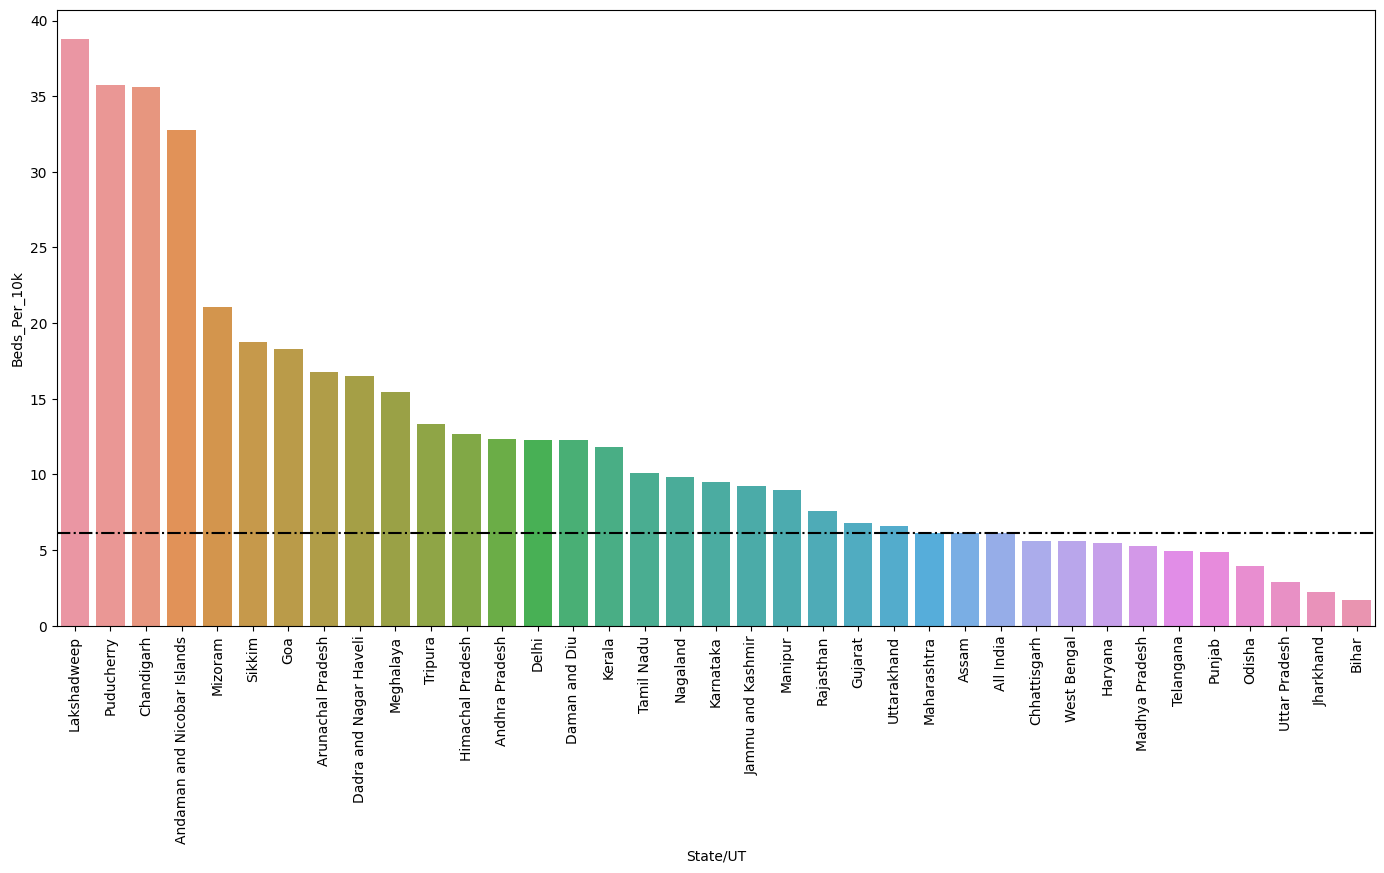

In [153]:
plt.figure(figsize=(17,8))
graph=sns.barplot(data=df,x='State/UT',y='Beds_Per_10k',order=df.sort_values('Beds_Per_10k',ascending=False)['State/UT'])
graph.axhline(6.114035,ls="-.",color='Black')
plt.xticks(rotation=90)

black line for all india value<br>
three least states are : <b>Uttar Pradesh</b>,<b>Jharkhand</b>,<b>Bihar</b>

In [154]:
least_beds_per10k=['Uttar Pradesh','Jharkhand','Bihar']

In [155]:
beds=df.copy()

<center><h3>Government Hospitals Requirement Analysis</h3></center>
The Union of Doctors in its meeting passed a resolution that the government hospitals are lacking in numbers in many states, The government has taken notice of the resolution and has asked for a recommendation for the state where a new government hospital can be set up. 
Use the government hospital data (Data/government_hospitals.csv) to suggest which state the government should create a new hospital.



### Problem Statement 13: (Multi-line header)
The header in (Data/government_hospitals.csv) is in 2 rows <br>
States/UTs	Rural hospitals	Urban hospitals	As on<br>
	No.	Beds	No.	Beds	<br>

The headers are required to be edited for ease of future use as well as for the sake of uniformity. <br>

Import and update the data in a way that it has the following column names<br>
	State/UT<br>
	Rural_Government_Hospitals<br>
	Rural_Government_Beds<br>
	Urban_Government_Hospitals<br>
	Urban_Government_Beds<br>
	Last_Updated<br>


In [156]:
govt_hosp=pd.read_csv('Data/government_hospitals.csv')

In [157]:
govt_hosp.head(10)

States/UTs Rural hospitals Unnamed: 2 Urban hospitals Unnamed: 4  \
0                 NaN             No.       Beds             No.       Beds   
1      Andhra Pradesh             193       6480              65      16658   
2  Arunachal Pradesh*             208       2136              10        268   
3               Assam            1176      10944              50       6198   
4               Bihar             930       6083             103       5936   
5        Chhattisgarh             169       5070              45       4342   
6                Goa*              17       1405              25       1608   
7             Gujarat             364      11715             122      20565   
8            Haryana*             609       6690              59       4550   
9   Himachal Pradesh*             705       5665              96       6734   

        As on  
0         NaN  
1  01.01.2017  
2  31.12.2017  
3  31.12.2017  
4  31.12.2016  
5  01.01.2016  
6  31.12.2017  
7  31.12.2016  
8  31.12.2016  
9  31.12.2017

In [158]:
govt_hosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   States/UTs       37 non-null     object
 1   Rural hospitals  38 non-null     object
 2   Unnamed: 2       38 non-null     object
 3   Urban hospitals  38 non-null     object
 4   Unnamed: 4       38 non-null     object
 5   As on            36 non-null     object
dtypes: object(6)
memory usage: 1.9+ KB


In [159]:
df=govt_hosp.copy()

In [160]:
df=df.loc[1:]

In [161]:
df.rename({'States/UTs':'State/UT',
          'Rural hospitals':'Rural_Government_Hospitals',
          'Unnamed: 2':'Rural_Government_Beds',
          'Urban hospitals':'Urban_Government_Hospitals',
          'Unnamed: 4':'Urban_Government_Beds',
          'As on':'Last_Updated'},axis=1,inplace = True)

In [162]:
df=df.reset_index()

In [163]:
df.drop(columns=['index'],axis=1, inplace=True)

In [164]:
df

State/UT Rural_Government_Hospitals  \
0              Andhra Pradesh                        193   
1          Arunachal Pradesh*                        208   
2                       Assam                       1176   
3                       Bihar                        930   
4                Chhattisgarh                        169   
5                        Goa*                         17   
6                     Gujarat                        364   
7                    Haryana*                        609   
8           Himachal Pradesh*                        705   
9             Jammu & Kashmir                         56   
10                  Jharkhand                        519   
11                 Karnataka*                       2471   
12                     Kerala                        981   
13             Madhya Pradesh                        334   
14                Maharashtra                        273   
15                    Manipur                         23   
16                 Meghalaya*                        143   
17                   Mizoram*                         56   
18                   Nagaland                         21   
19                    Odisha*                       1655   
20                    Punjab*                        510   
21                  Rajasthan                        602   
22                    Sikkim*                         24   
23                Tamil Nadu*                        692   
24                 Telangana*                        802   
25                   Tripura*                         99   
26             Uttar Pradesh*                       4442   
27                Uttarakhand                        410   
28                West Bengal                       1272   
29  Andaman & Nicobar Islands                         27   
30                 Chandigarh                          0   
31      Dadra & Nagar Haveli*                         10   
32                Daman & Diu                          5   
33                      Delhi                          0   
34                Lakshadweep                          9   
35                 Puducherry                          3   
36                      INDIA                      19810   

   Rural_Government_Beds Urban_Government_Hospitals Urban_Government_Beds  \
0                   6480                         65                 16658   
1                   2136                         10                   268   
2                  10944                         50                  6198   
3                   6083                        103                  5936   
4                   5070                         45                  4342   
5                   1405                         25                  1608   
6                  11715                        122                 20565   
7                   6690                         59                  4550   
8                   5665                         96                  6734   
9                   7234                         76                  4417   
10                  5842                         36                  4942   
11                 21072                        374                 49093   
12                 16865                        299                 21139   
13                 10020                        117                 18819   
14                 12398                        438                 39048   
15                   730                          7                   697   
16                  1970                         14                  2487   
17                   604                         34                  1393   
18                   630                         15                  1250   
19                  6339                        149                 12180   
20                  5805                        172                 12128   
21                 21088                      

### Problem Statement 14: (Data update and code reuse)
The ”Last_Updated” column contains a date that is in the format  DD.MM.YYYY but in the future, the date is required in a different format (YYYY-MM-DD)  update the date to the required format.<br>
The State/UT names have some different formats compared to other census and housing data. Fix those issues using the function created earlier. If the function created earlier for all_hospitals cannot be used for government_hospital then edit the function so that it can be used for both.<br>
Create a new file “government_hospital.csv” in the “Clean” folder and save all the government hospital data after the update.


In [165]:
statename_format(df)

C:\Users\miles\AppData\Local\Temp\ipykernel_21588\1881072675.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['State/UT']=df['State/UT'].str.replace(' & ',' and ').str.replace('*','')


In [166]:
df.head()

State/UT Rural_Government_Hospitals Rural_Government_Beds  \
0     Andhra Pradesh                        193                  6480   
1  Arunachal Pradesh                        208                  2136   
2              Assam                       1176                 10944   
3              Bihar                        930                  6083   
4       Chhattisgarh                        169                  5070   

  Urban_Government_Hospitals Urban_Government_Beds Last_Updated  
0                         65                 16658   01.01.2017  
1                         10                   268   31.12.2017  
2                         50                  6198   31.12.2017  
3                        103                  5936   31.12.2016  
4                         45                  4342   01.01.2016

In [167]:
df['Last_Updated']=pd.to_datetime(df['Last_Updated'],format='%d.%m.%Y')

In [168]:
# now change data type of all columns as this will helpful for us in future
df['Rural_Government_Hospitals']=df['Rural_Government_Hospitals'].astype(int)
df['Rural_Government_Beds']=df['Rural_Government_Beds'].astype(int)
df['Urban_Government_Hospitals']=df['Urban_Government_Hospitals'].astype(int)
df['Urban_Government_Beds']=df['Urban_Government_Beds'].astype(int)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   State/UT                    37 non-null     object        
 1   Rural_Government_Hospitals  37 non-null     int32         
 2   Rural_Government_Beds       37 non-null     int32         
 3   Urban_Government_Hospitals  37 non-null     int32         
 4   Urban_Government_Beds       37 non-null     int32         
 5   Last_Updated                36 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int32(4), object(1)
memory usage: 1.3+ KB


In [170]:
df.head()

State/UT  Rural_Government_Hospitals  Rural_Government_Beds  \
0     Andhra Pradesh                         193                   6480   
1  Arunachal Pradesh                         208                   2136   
2              Assam                        1176                  10944   
3              Bihar                         930                   6083   
4       Chhattisgarh                         169                   5070   

   Urban_Government_Hospitals  Urban_Government_Beds Last_Updated  
0                          65                  16658   2017-01-01  
1                          10                    268   2017-12-31  
2                          50                   6198   2017-12-31  
3                         103                   5936   2016-12-31  
4                          45                   4342   2016-01-01

In [171]:
df.to_csv('Clean_Data/government_hospital.csv')

In [172]:
govt_hosp=df.copy()

### Problem Statement 15: (Government healthcare facility disparity)
Since the resources are limited, it is required to identify the region which lacks the healthcare facility the most for creating new government hospitals.<br>
An idea was suggested* that first the three States/UTs which have the least amount of beds (in all hospitals government and private) for their population is identified. Among those three the state which has the least number of government hospitals can be recommended for setting up a new government hospital.


In [173]:
# from hospitals dataset in problem staement 12
least_beds_per10k

['Uttar Pradesh', 'Jharkhand', 'Bihar']

In [174]:
# so from govt hospital data we take these state's data
df1=govt_hosp.copy()

In [175]:
df1=df.loc[df['State/UT'].isin(least_beds_per10k),['State/UT','Rural_Government_Hospitals','Urban_Government_Hospitals']]

In [176]:
df1 

State/UT  Rural_Government_Hospitals  Urban_Government_Hospitals
3           Bihar                         930                         103
10      Jharkhand                         519                          36
26  Uttar Pradesh                        4442                         193

In [177]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 3 to 26
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   State/UT                    3 non-null      object
 1   Rural_Government_Hospitals  3 non-null      int32 
 2   Urban_Government_Hospitals  3 non-null      int32 
dtypes: int32(2), object(1)
memory usage: 72.0+ bytes


In [178]:
df1['Total_govt_hosp']=df1['Rural_Government_Hospitals']+df1['Urban_Government_Hospitals']

In [179]:
df1

State/UT  Rural_Government_Hospitals  Urban_Government_Hospitals  \
3           Bihar                         930                         103   
10      Jharkhand                         519                          36   
26  Uttar Pradesh                        4442                         193   

    Total_govt_hosp  
3              1033  
10              555  
26             4635

<AxesSubplot: xlabel='State/UT', ylabel='Total_govt_hosp'>

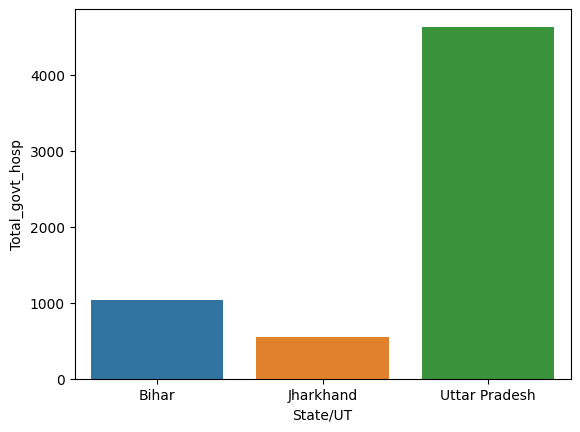

In [180]:
sns.barplot(data=df1,x='State/UT',y='Total_govt_hosp')

## Observtion : 
    here we can see that out of these 3 states Jharkhand has least no of govt hospitals.
    so we can open new govt hospital in Jharkhand

### <center>World Health Organization Standards</center>
According to WHO standards, a minimum of 3 beds per 1000 people is required. Monica wants to analyse whether different regions in India as well as the nation as a whole are up to that standard. If not, how many facilities are required to fill the gap?



### Problem Statement 16: (Gap in number of beds)
Visually represent the difference between the expected number of hospital beds and the available number of hospital beds in each State/UT, as well as at the national level (if any).



In [181]:
beds.head()

State/UT  HospitalBeds   Population  Beds_Per_10k
0  Andaman and Nicobar Islands        1246.0     380581.0     32.739417
1               Andhra Pradesh       60799.0   49386799.0     12.310780
2            Arunachal Pradesh        2320.0    1383727.0     16.766313
3                        Assam       19115.0   31205576.0      6.125508
4                        Bihar       17796.0  104099452.0      1.709519

In [182]:
df=beds.copy()

In [183]:
# now we have beds per 10k , so get beds per 1k we just divde beds per 10k with 10

In [184]:
df['Beds_Per_1k']=df['Beds_Per_10k']/10

In [185]:
df.head()

State/UT  HospitalBeds   Population  Beds_Per_10k  \
0  Andaman and Nicobar Islands        1246.0     380581.0     32.739417   
1               Andhra Pradesh       60799.0   49386799.0     12.310780   
2            Arunachal Pradesh        2320.0    1383727.0     16.766313   
3                        Assam       19115.0   31205576.0      6.125508   
4                        Bihar       17796.0  104099452.0      1.709519   

   Beds_Per_1k  
0     3.273942  
1     1.231078  
2     1.676631  
3     0.612551  
4     0.170952

In [186]:
# now plot graph

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'Lakshadweep'),
  Text(1, 0, 'Puducherry'),
  Text(2, 0, 'Chandigarh'),
  Text(3, 0, 'Andaman and Nicobar Islands'),
  Text(4, 0, 'Mizoram'),
  Text(5, 0, 'Sikkim'),
  Text(6, 0, 'Goa'),
  Text(7, 0, 'Arunachal Pradesh'),
  Text(8, 0, 'Dadra and Nagar Haveli'),
  Text(9, 0, 'Meghalaya'),
  Text(10, 0, 'Tripura'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Andhra Pradesh'),
  Text(13, 0, 'Delhi'),
  Text(14, 0, 'Daman and Diu'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Tamil Nadu'),
  Text(17, 0, 'Nagaland'),
  Text(18, 0, 'Karnataka'),
  Text(19, 0, 'Jammu and Kashmir'),
  Text(20, 0, 'Manipur'),
  Text(21, 0, 'Rajasthan'),
  Text(22, 0, 'Gujarat'),
  Text(23, 0, 'Uttarakhand'),
  Text(24, 0, 'Maharashtra'),
  Text(25, 0, 'Assam'),
  Text(26, 0, 'All India'),
  Text(27, 0, 'Chhattisgarh'),
  Text

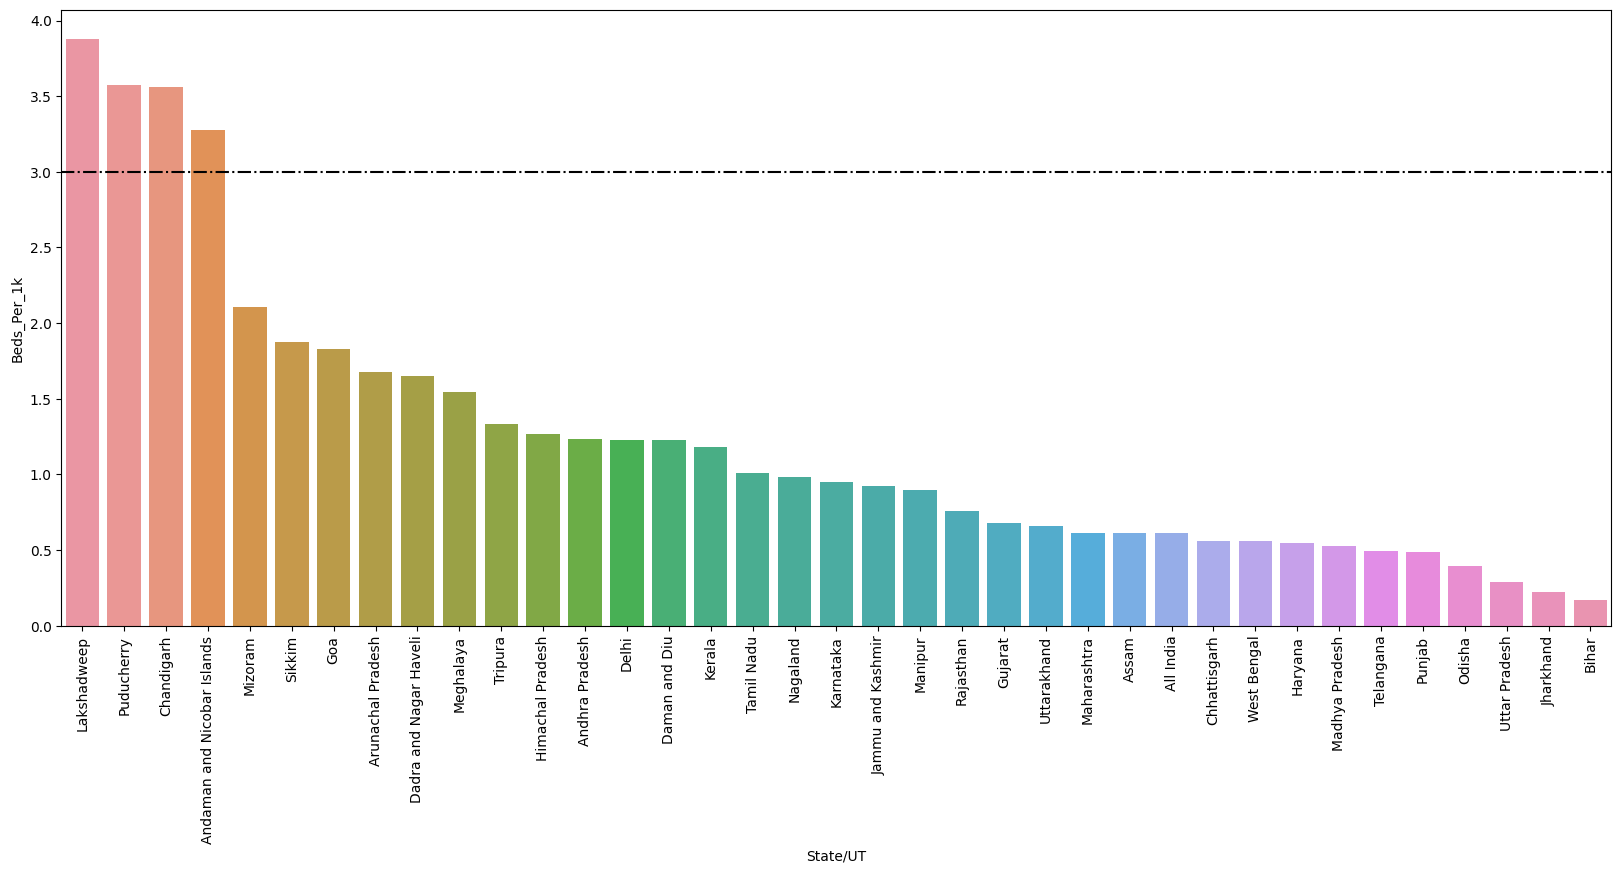

In [187]:
plt.figure(figsize=(20,8))
graph=sns.barplot(data=df,x='State/UT',y='Beds_Per_1k',order=df.sort_values('Beds_Per_1k',ascending=False)['State/UT'])
graph.axhline(3,ls="-.",color='Black')
plt.xticks(rotation=90)

In [188]:
# sufficient beds are in only 4 states : Lakshdweep, Puducherry, Chandigarh, Andaman and Nicobar Islands
sufficient_beds=['Lakshadweep','Puducherry','Chandigarh','Andaman and Nicobar Islands']

### Problem Statement 17: (Hospitals required to meet the standards)
In a hypothetical situation if the government wishes to fill the gap between the available facility and the WHO standards all by itself how many government hospitals may be required in each state or union territory as well as at the national level?


In [189]:
beds=df.copy()
df=beds.copy()

In [190]:
# to get required data we just need state name where no of beds per 1k people is less than 3

In [191]:
df=df[~df['State/UT'].isin(sufficient_beds)]

In [192]:
df['Required_beds']=(df['Population']*3/1000).astype(int)

In [193]:
df['Bed_diff']=df['Required_beds']-df['HospitalBeds']

In [194]:
df

State/UT  HospitalBeds    Population  Beds_Per_10k  \
1           Andhra Pradesh       60799.0  4.938680e+07     12.310780   
2        Arunachal Pradesh        2320.0  1.383727e+06     16.766313   
3                    Assam       19115.0  3.120558e+07      6.125508   
4                    Bihar       17796.0  1.040995e+08      1.709519   
6             Chhattisgarh       14354.0  2.554520e+07      5.619060   
7   Dadra and Nagar Haveli         568.0  3.437090e+05     16.525607   
8            Daman and Diu         298.0  2.432470e+05     12.250922   
9                    Delhi       20572.0  1.678794e+07     12.254034   
10                     Goa        2666.0  1.458545e+06     18.278490   
11                 Gujarat       41129.0  6.043969e+07      6.804965   
12                 Haryana       13841.0  2.535146e+07      5.459646   
13        Himachal Pradesh        8706.0  6.864602e+06     12.682454   
14       Jammu and Kashmir       11342.0  1.226701e+07      9.245935   
15               Jharkhand        7404.0  3.298813e+07      2.244443   
16               Karnataka       56333.0  5.924827e+07      9.507956   
17                  Kerala       39511.0  3.340606e+07     11.827494   
19          Madhya Pradesh       38140.0  7.262681e+07      5.251504   
20             Maharashtra       68998.0  1.123743e+08      6.140014   
21                 Manipur        2562.0  2.855794e+06      8.971235   
22               Meghalaya        4585.0  2.966889e+06     15.453898   
23                 Mizoram        2312.0  1.097206e+06     21.071704   
24                Nagaland        1944.0  1.978502e+06      9.825616   
25                  Odisha       16497.0  4.197422e+07      3.930270   
27                  Punjab       13527.0  2.774334e+07      4.875765   
28               Rajasthan       51844.0  6.854844e+07      7.563119   
29                  Sikkim        1145.0  6.105770e+05     18.752754   
30              Tamil Nadu       72616.0  7.214703e+07     10.065002   
31               Telangana       17358.0  3.519398e+07      4.932094   
32                 Tripura        4895.0  3.673917e+06     13.323654   
33           Uttar Pradesh       58310.0  1.998123e+08      2.918238   
34             Uttarakhand        6660.0  1.008629e+07      6.603021   
35             West Bengal       51163.0  9.127612e+07      5.605300   
36               All India      739024.0  1.208734e+09      6.114035   

    Beds_Per_1k  Required_beds   Bed_diff  
1      1.231078         148160    87361.0  
2      1.676631           4151     1831.0  
3      0.612551          93616    74501.0  
4      0.170952         312298   294502.0  
6      0.561906          76635    62281.0  
7      1.652561           1031      463.0  
8      1.225092            729      431.0  
9      1.225403          50363    29791.0  
10     1.827849           4375     1709.0  
11     0.680497         181319   140190.0  
12     0.545965          76054    62213.0  
13     1.268245          20593    11887.0  
14     0.924593          36801    25459.0  
15     0.224444          98964    91560.0  
16     0.950796         177744   121411.0  
17     1.182749         100218    60707.0  
19     0.525150         217880   179740.0  
20     0.614001         337122   268124.0  
21     0.897124           8567     6005.0  
22     1.545390           8900     4315.0  
23     2.107170           3291      979.0  
24     0.982562           5935     3991.0  
25     0.393027         125922   109425.0  
27     0.487577          83230    69703.0  
28     0.756312         205645   153801.0  
29     1.875275           1831      686.0  
30     1.006500         216441   143825.0  
31     0.493209         105581    88223.0  
32     1.332365          11021     6126.0  
33     0.291824         599437   541127.0  
34     0.660302          30258    23598.0  
35     0.560530         273828   222665.0  
36     0.611404        3626200  2887176.0

In [195]:
# hospital columns are in string convert them to int
hospital

State/UT Primary Health Centers  \
0   Andaman and Nicobar Islands                     27   
1                Andhra Pradesh                   1417   
2             Arunachal Pradesh                    122   
3                         Assam                   1007   
4                         Bihar                   2007   
5                    Chandigarh                     40   
6                  Chhattisgarh                    813   
7        Dadra and Nagar Haveli                      9   
8                 Daman and Diu                      4   
9                         Delhi                    534   
10                          Goa                     31   
11                      Gujarat                   1770   
12                      Haryana                    500   
13             Himachal Pradesh                    516   
14            Jammu and Kashmir                    702   
15                    Jharkhand                    343   
16                    Karnataka                   2547   
17                       Kerala                    933   
18                  Lakshadweep                      4   
19               Madhya Pradesh                   1420   
20                  Maharashtra                   2638   
21                      Manipur                     87   
22                    Meghalaya                    138   
23                      Mizoram                     65   
24                     Nagaland                    134   
25                       Odisha                   1360   
26                   Puducherry                     40   
27                       Punjab                    521   
28                    Rajasthan                   2463   
29                       Sikkim                     25   
30                   Tamil Nadu                   1854   
31                    Telangana                    788   
32                      Tripura                    114   
33                Uttar Pradesh                   3277   
34                  Uttarakhand                    275   
35                  West Bengal                   1374   
36                    All India                 29,899   

   Community Health Centers Sub-District/Divisional Hospitals  \
0                         4                               NaN   
1                       198                                31   
2                        62                               NaN   
3                       166                                14   
4                        63                                33   
5                         2                                 1   
6                       166                                12   
7                         2                                 1   
8                         2                               NaN   
9                        25                                 9   
10                        4                                 2   
11                      385                                44   
12                      131                                24   
13                       79                                61   
14                       87                               NaN   
15                      179                                13   
16                      207                               147   
17                      229                                82   
18                        3                                 2   
19                      324                                72   
20                      430                               101   
21                       17                                 1   
22                       29                               NaN   
23                       10                                 3   
24                       21                               NaN   
25                      377                                27   
26                        4                                 5  

In [196]:
hospital.loc[hospital['State/UT']=='All India','HospitalBeds']=739024
hospital.loc[hospital['State/UT']=='All India','Primary Health Centers']=29899
hospital.loc[hospital['State/UT']=='All India','Community Health Centers']=5568
hospital.loc[hospital['State/UT']=='All India','Sub-District/Divisional Hospitals']=1255
hospital.loc[hospital['State/UT']=='All India','District Hospitals']=1003
hospital.loc[hospital['State/UT']=='All India','Hospitals']=37725


In [197]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   State/UT                           37 non-null     object
 1   Primary Health Centers             37 non-null     object
 2   Community Health Centers           37 non-null     object
 3   Sub-District/Divisional Hospitals  30 non-null     object
 4   District Hospitals                 37 non-null     object
 5   Hospitals                          37 non-null     object
 6   HospitalBeds                       37 non-null     object
dtypes: object(7)
memory usage: 2.2+ KB


In [198]:
hospital= hospital.fillna(0)


In [199]:
hospital['Primary Health Centers']=hospital['Primary Health Centers'].astype(int)
hospital['Community Health Centers']=hospital['Community Health Centers'].astype(int)
hospital['Sub-District/Divisional Hospitals']=hospital['Sub-District/Divisional Hospitals'].astype(int)
hospital['District Hospitals']=hospital['District Hospitals'].astype(int)
hospital['Hospitals']=hospital['Hospitals'].astype(int)
hospital['HospitalBeds']=hospital['HospitalBeds'].astype(int)

In [200]:
df2=govt_hosp.copy()

In [201]:
df2

State/UT  Rural_Government_Hospitals  \
0                Andhra Pradesh                         193   
1             Arunachal Pradesh                         208   
2                         Assam                        1176   
3                         Bihar                         930   
4                  Chhattisgarh                         169   
5                           Goa                          17   
6                       Gujarat                         364   
7                       Haryana                         609   
8              Himachal Pradesh                         705   
9             Jammu and Kashmir                          56   
10                    Jharkhand                         519   
11                    Karnataka                        2471   
12                       Kerala                         981   
13               Madhya Pradesh                         334   
14                  Maharashtra                         273   
15                      Manipur                          23   
16                    Meghalaya                         143   
17                      Mizoram                          56   
18                     Nagaland                          21   
19                       Odisha                        1655   
20                       Punjab                         510   
21                    Rajasthan                         602   
22                       Sikkim                          24   
23                   Tamil Nadu                         692   
24                    Telangana                         802   
25                      Tripura                          99   
26                Uttar Pradesh                        4442   
27                  Uttarakhand                         410   
28                  West Bengal                        1272   
29  Andaman and Nicobar Islands                          27   
30                   Chandigarh                           0   
31       Dadra and Nagar Haveli                          10   
32                Daman and Diu                           5   
33                        Delhi                           0   
34                  Lakshadweep                           9   
35                   Puducherry                           3   
36                        INDIA                       19810   

    Rural_Government_Beds  Urban_Government_Hospitals  Urban_Government_Beds  \
0                    6480                          65                  16658   
1                    2136                          10                    268   
2                   10944                          50                   6198   
3                    6083                         103                   5936   
4                    5070                          45                   4342   
5                    1405                          25                   1608   
6                   11715                         122                  20565   
7                    6690                          59                   4550   
8                    5665                          96                   6734   
9                    7234                          76                   4417   
10                   5842                          36                   4942   
11                  21072                         374                  49093   
12                  16865                         299                  21139   
13                  10020                         117                  18819   
14                  12398                         438                  39048   
15                    730                           7                    697   
16                   1970                          14                   2487   
17                    604                          34                   1393   
18                    630                          15                   1250   
19                   6339   

In [202]:
df2['Hospitals']=df2['Rural_Government_Hospitals']+df2['Urban_Government_Hospitals']
df2['Beds']=df2['Rural_Government_Beds']+df2['Urban_Government_Beds']

In [203]:
df2=df2[['State/UT','Hospitals','Beds']]

In [204]:
joined=pd.merge(df,df2,on =['State/UT'],how='left')

In [205]:
joined

State/UT  HospitalBeds    Population  Beds_Per_10k  \
0           Andhra Pradesh       60799.0  4.938680e+07     12.310780   
1        Arunachal Pradesh        2320.0  1.383727e+06     16.766313   
2                    Assam       19115.0  3.120558e+07      6.125508   
3                    Bihar       17796.0  1.040995e+08      1.709519   
4             Chhattisgarh       14354.0  2.554520e+07      5.619060   
5   Dadra and Nagar Haveli         568.0  3.437090e+05     16.525607   
6            Daman and Diu         298.0  2.432470e+05     12.250922   
7                    Delhi       20572.0  1.678794e+07     12.254034   
8                      Goa        2666.0  1.458545e+06     18.278490   
9                  Gujarat       41129.0  6.043969e+07      6.804965   
10                 Haryana       13841.0  2.535146e+07      5.459646   
11        Himachal Pradesh        8706.0  6.864602e+06     12.682454   
12       Jammu and Kashmir       11342.0  1.226701e+07      9.245935   
13               Jharkhand        7404.0  3.298813e+07      2.244443   
14               Karnataka       56333.0  5.924827e+07      9.507956   
15                  Kerala       39511.0  3.340606e+07     11.827494   
16          Madhya Pradesh       38140.0  7.262681e+07      5.251504   
17             Maharashtra       68998.0  1.123743e+08      6.140014   
18                 Manipur        2562.0  2.855794e+06      8.971235   
19               Meghalaya        4585.0  2.966889e+06     15.453898   
20                 Mizoram        2312.0  1.097206e+06     21.071704   
21                Nagaland        1944.0  1.978502e+06      9.825616   
22                  Odisha       16497.0  4.197422e+07      3.930270   
23                  Punjab       13527.0  2.774334e+07      4.875765   
24               Rajasthan       51844.0  6.854844e+07      7.563119   
25                  Sikkim        1145.0  6.105770e+05     18.752754   
26              Tamil Nadu       72616.0  7.214703e+07     10.065002   
27               Telangana       17358.0  3.519398e+07      4.932094   
28                 Tripura        4895.0  3.673917e+06     13.323654   
29           Uttar Pradesh       58310.0  1.998123e+08      2.918238   
30             Uttarakhand        6660.0  1.008629e+07      6.603021   
31             West Bengal       51163.0  9.127612e+07      5.605300   
32               All India      739024.0  1.208734e+09      6.114035   

    Beds_Per_1k  Required_beds   Bed_diff  Hospitals     Beds  
0      1.231078         148160    87361.0      258.0  23138.0  
1      1.676631           4151     1831.0      218.0   2404.0  
2      0.612551          93616    74501.0     1226.0  17142.0  
3      0.170952         312298   294502.0     1033.0  12019.0  
4      0.561906          76635    62281.0      214.0   9412.0  
5      1.652561           1031      463.0       11.0    589.0  
6      1.225092            729      431.0        5.0    240.0  
7      1.225403          50363    29791.0      109.0  24383.0  
8      1.827849           4375     1709.0       42.0   3013.0  
9      0.680497         181319   140190.0      486.0  32280.0  
10     0.545965          76054    62213.0      668.0  11240.0  
11     1.268245          20593    11887.0      801.0  12399.0  
12     0.924593          36801    25459.0      132.0  11651.0  
13     0.224444          98964    91560.0      555.0  10784.0  
14     0.950796         177744   121411.0     2845.0  70165.0  
15     1.182749         100218    60707.0     1280.0  38004.0  
16     0.525150         217880   179740.0      451.0  28839.0  
17     0.614001         337122   268124.0      711.0  51446.0  
18     0.897124           8567     6005.0       30.0   1427.0  
19     1.545390           8900     4315.0      157.0   4457.0  
20     2.107170           3291      979.0       90.0   1997.0  
21     0.982562           5935     3991.0       36.0   1880.0  
22     0.393027         125922   109425.0     1804.0  18519.0  
23     0.487577          83230   

In [206]:
joined.loc[32,'Hospitals']=joined['Hospitals'].sum()
joined.loc[32,'Beds']=joined['Beds'].sum()

In [207]:
joined['Beds_Per_Hosp']=(joined['Beds']/joined['Hospitals']).astype(int)

In [208]:
joined['Hosp_Need']=(joined['Bed_diff']/joined['Beds_Per_Hosp']).apply(np.ceil)

In [209]:
joined

State/UT  HospitalBeds    Population  Beds_Per_10k  \
0           Andhra Pradesh       60799.0  4.938680e+07     12.310780   
1        Arunachal Pradesh        2320.0  1.383727e+06     16.766313   
2                    Assam       19115.0  3.120558e+07      6.125508   
3                    Bihar       17796.0  1.040995e+08      1.709519   
4             Chhattisgarh       14354.0  2.554520e+07      5.619060   
5   Dadra and Nagar Haveli         568.0  3.437090e+05     16.525607   
6            Daman and Diu         298.0  2.432470e+05     12.250922   
7                    Delhi       20572.0  1.678794e+07     12.254034   
8                      Goa        2666.0  1.458545e+06     18.278490   
9                  Gujarat       41129.0  6.043969e+07      6.804965   
10                 Haryana       13841.0  2.535146e+07      5.459646   
11        Himachal Pradesh        8706.0  6.864602e+06     12.682454   
12       Jammu and Kashmir       11342.0  1.226701e+07      9.245935   
13               Jharkhand        7404.0  3.298813e+07      2.244443   
14               Karnataka       56333.0  5.924827e+07      9.507956   
15                  Kerala       39511.0  3.340606e+07     11.827494   
16          Madhya Pradesh       38140.0  7.262681e+07      5.251504   
17             Maharashtra       68998.0  1.123743e+08      6.140014   
18                 Manipur        2562.0  2.855794e+06      8.971235   
19               Meghalaya        4585.0  2.966889e+06     15.453898   
20                 Mizoram        2312.0  1.097206e+06     21.071704   
21                Nagaland        1944.0  1.978502e+06      9.825616   
22                  Odisha       16497.0  4.197422e+07      3.930270   
23                  Punjab       13527.0  2.774334e+07      4.875765   
24               Rajasthan       51844.0  6.854844e+07      7.563119   
25                  Sikkim        1145.0  6.105770e+05     18.752754   
26              Tamil Nadu       72616.0  7.214703e+07     10.065002   
27               Telangana       17358.0  3.519398e+07      4.932094   
28                 Tripura        4895.0  3.673917e+06     13.323654   
29           Uttar Pradesh       58310.0  1.998123e+08      2.918238   
30             Uttarakhand        6660.0  1.008629e+07      6.603021   
31             West Bengal       51163.0  9.127612e+07      5.605300   
32               All India      739024.0  1.208734e+09      6.114035   

    Beds_Per_1k  Required_beds   Bed_diff  Hospitals      Beds  Beds_Per_Hosp  \
0      1.231078         148160    87361.0      258.0   23138.0             89   
1      1.676631           4151     1831.0      218.0    2404.0             11   
2      0.612551          93616    74501.0     1226.0   17142.0             13   
3      0.170952         312298   294502.0     1033.0   12019.0             11   
4      0.561906          76635    62281.0      214.0    9412.0             43   
5      1.652561           1031      463.0       11.0     589.0             53   
6      1.225092            729      431.0        5.0     240.0             48   
7      1.225403          50363    29791.0      109.0   24383.0            223   
8      1.827849           4375     1709.0       42.0    3013.0             71   
9      0.680497         181319   140190.0      486.0   32280.0             66   
10     0.545965          76054    62213.0      668.0   11240.0             16   
11     1.268245          20593    11887.0      801.0   12399.0             15   
12     0.924593          36801    25459.0      132.0   11651.0             88   
13     0.224444          98964    91560.0      555.0   10784.0             19   
14     0.950796         177744   121411.0     2845.0   70165.0             24   
15     1.182749         100218    60707.0     1280.0   38004.0             29   
16     0.525150         217880   179740.0      451.0   28839.0             63   
17     0.614001         337122   268124.0      711.0   51446.0             72   
18     0.897124           8567

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'All India'),
  Text(1, 0, 'Uttar Pradesh'),
  Text(2, 0, 'Bihar'),
  Text(3, 0, 'Odisha'),
  Text(4, 0, 'Assam'),
  Text(5, 0, 'Karnataka'),
  Text(6, 0, 'Jharkhand'),
  Text(7, 0, 'West Bengal'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Maharashtra'),
  Text(10, 0, 'Telangana'),
  Text(11, 0, 'Rajasthan'),
  Text(12, 0, 'Madhya Pradesh'),
  Text(13, 0, 'Punjab'),
  Text(14, 0, 'Tamil Nadu'),
  Text(15, 0, 'Gujarat'),
  Text(16, 0, 'Kerala'),
  Text(17, 0, 'Chhattisgarh'),
  Text(18, 0, 'Uttarakhand'),
  Text(19, 0, 'Andhra Pradesh'),
  Text(20, 0, 'Himachal Pradesh'),
  Text(21, 0, 'Jammu and Kashmir'),
  Text(22, 0, 'Tripura'),
  Text(23, 0, 'Arunachal Pradesh'),
  Text(24, 0, 'Meghalaya'),
  Text(25, 0, 'Delhi'),
  Text(26, 0, 'Manipur'),
  Text(27, 0, 'Nagaland'),
  Text(28, 0, 'Mizoram'),
  Text(29, 0, 'Goa'),
  Text(30, 

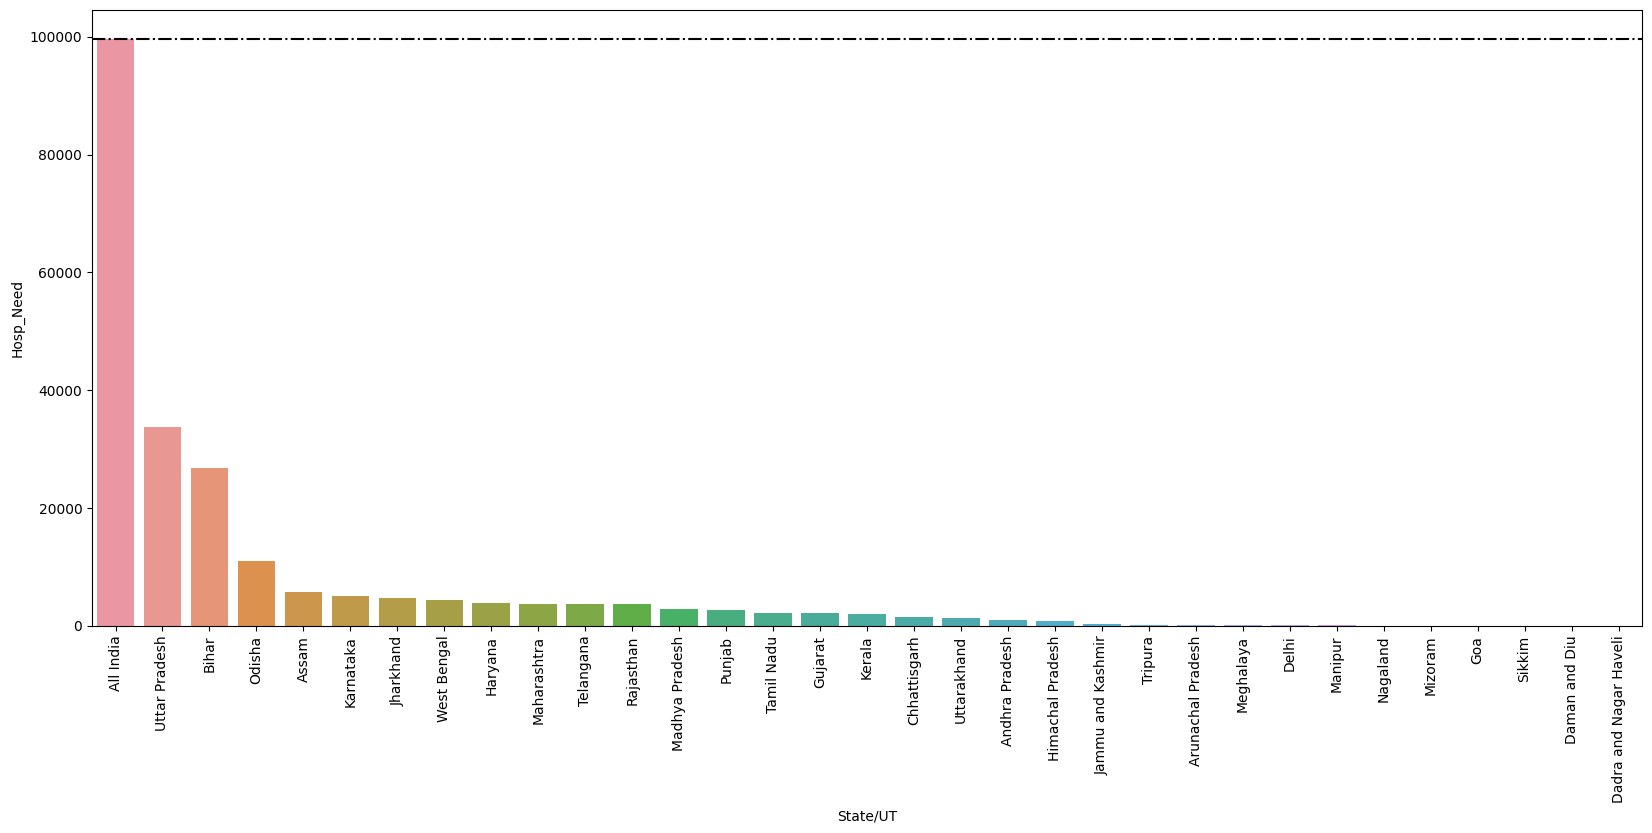

In [210]:
plt.figure(figsize=(20,8))
graph=sns.barplot(data=joined,x='State/UT',y='Hosp_Need',order=joined.sort_values('Hosp_Need',ascending=False)['State/UT'])
graph.axhline(99558,ls="-.",color='Black')
plt.xticks(rotation=90)

In [211]:
# dropping all india data as due to this plot is not visible properly
joined=joined.iloc[:-1,:]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Bihar'),
  Text(2, 0, 'Odisha'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Karnataka'),
  Text(5, 0, 'Jharkhand'),
  Text(6, 0, 'West Bengal'),
  Text(7, 0, 'Haryana'),
  Text(8, 0, 'Maharashtra'),
  Text(9, 0, 'Telangana'),
  Text(10, 0, 'Rajasthan'),
  Text(11, 0, 'Madhya Pradesh'),
  Text(12, 0, 'Punjab'),
  Text(13, 0, 'Tamil Nadu'),
  Text(14, 0, 'Gujarat'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Chhattisgarh'),
  Text(17, 0, 'Uttarakhand'),
  Text(18, 0, 'Andhra Pradesh'),
  Text(19, 0, 'Himachal Pradesh'),
  Text(20, 0, 'Jammu and Kashmir'),
  Text(21, 0, 'Tripura'),
  Text(22, 0, 'Arunachal Pradesh'),
  Text(23, 0, 'Meghalaya'),
  Text(24, 0, 'Delhi'),
  Text(25, 0, 'Manipur'),
  Text(26, 0, 'Nagaland'),
  Text(27, 0, 'Mizoram'),
  Text(28, 0, 'Goa'),
  Text(29, 0, 'Sikkim'),
  Text(30, 0, 'Dam

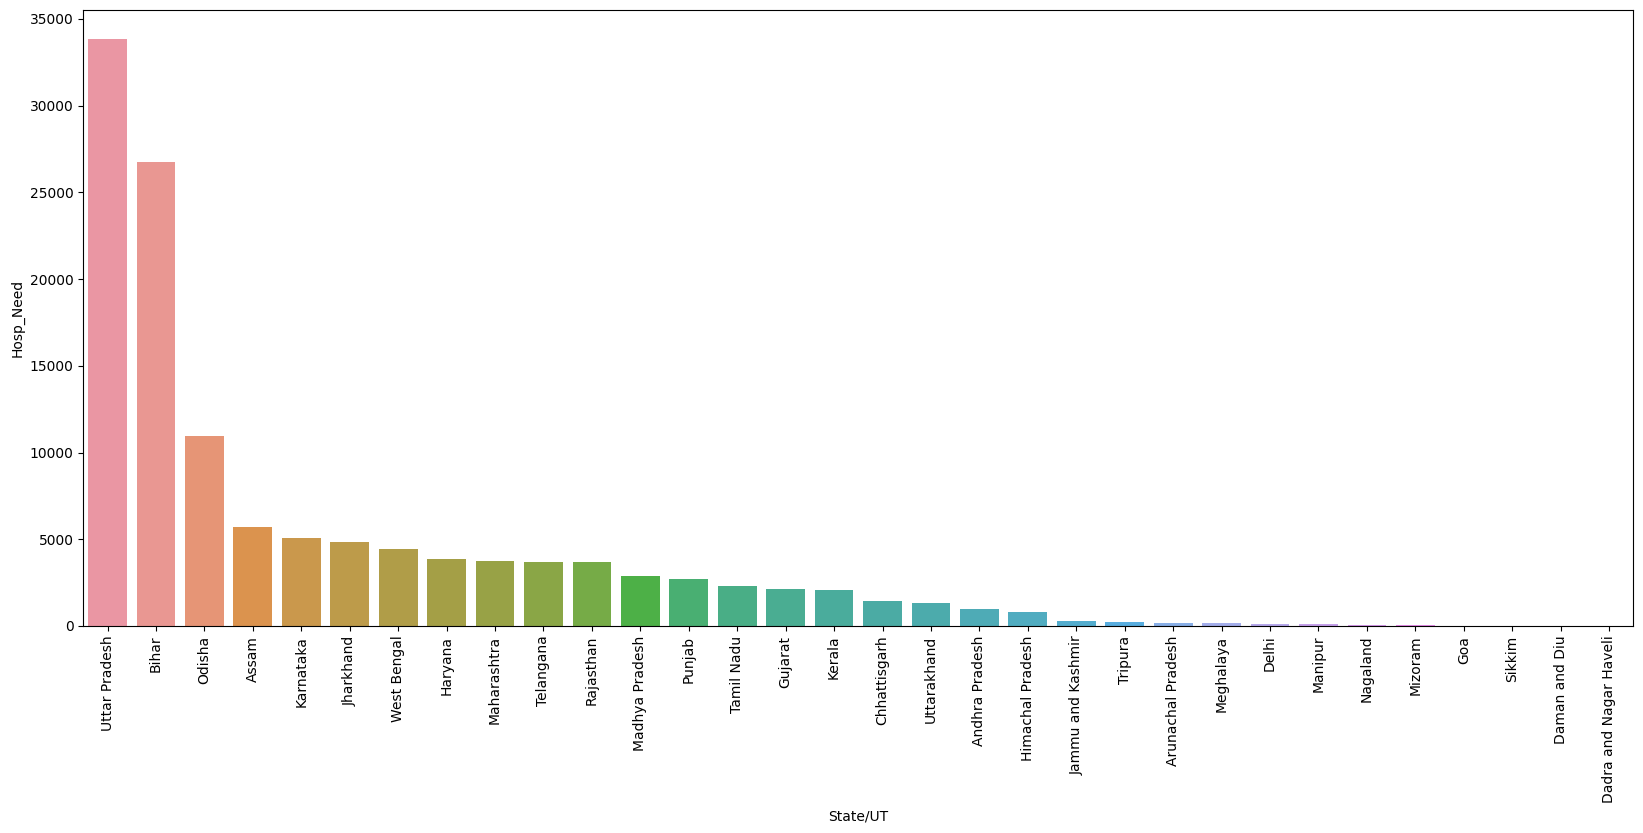

In [212]:
plt.figure(figsize=(20,8))
graph=sns.barplot(data=joined,x='State/UT',y='Hosp_Need',order=joined.sort_values('Hosp_Need',ascending=False)['State/UT'])
plt.xticks(rotation=90)

### Problem Statement 20: (Run Query on the database and use in python)
Write a query that finds the number of households without a toilet on the premise for each district of the state that has the least hospital bed-to-population ratio. <br>
Display the information using python.


In [213]:
# State with least hospital to bed ratio ---> Bihar
# so get no. of households without toilet premise we need housing data where State/UT== 'Bihar'

df=housing.copy()

In [214]:
df=df[df['State/UT']=='Bihar']

In [215]:
df=df[['District','Households_Rural','Households_Urban','Households_Rural_Latrine_premise','Households_Urban_Latrine_premise']]

In [216]:
df['Households']=df['Households_Rural']+df['Households_Urban']
df['Households_with_latrine_premise']=df['Households_Rural_Latrine_premise']+df['Households_Urban_Latrine_premise']

In [217]:
df=df[['District','Households','Households_with_latrine_premise']]

In [218]:
df['Households_Without_Latrine_premise']=df['Households']-df['Households_with_latrine_premise']

In [219]:
df['Households_Without_Latrine_premise (10K)']=(df['Households_Without_Latrine_premise']/10000).astype(int)

In [220]:
df.head()

District  Households  Households_with_latrine_premise  \
200  Pashchim Champaran    936134.0                           148622   
201     Purba Champaran   1243825.0                           231895   
202             Sheohar    166000.0                            34152   
203           Sitamarhi    856964.0                           181013   
204           Madhubani   1088786.0                           204110   

     Households_Without_Latrine_premise  \
200                            787512.0   
201                           1011930.0   
202                            131848.0   
203                            675951.0   
204                            884676.0   

     Households_Without_Latrine_premise (10K)  
200                                        78  
201                                       101  
202                                        13  
203                                        67  
204                                        88

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'Purba Champaran'),
  Text(1, 0, 'Madhubani'),
  Text(2, 0, 'Samastipur'),
  Text(3, 0, 'Muzaffarpur'),
  Text(4, 0, 'Pashchim Champaran'),
  Text(5, 0, 'Darbhanga'),
  Text(6, 0, 'Purnia'),
  Text(7, 0, 'Sitamarhi'),
  Text(8, 0, 'Araria'),
  Text(9, 0, 'Saran'),
  Text(10, 0, 'Gaya'),
  Text(11, 0, 'Katihar'),
  Text(12, 0, 'Patna'),
  Text(13, 0, 'Vaishali'),
  Text(14, 0, 'Supaul'),
  Text(15, 0, 'Siwan'),
  Text(16, 0, 'Begusarai'),
  Text(17, 0, 'Gopalganj'),
  Text(18, 0, 'Madhepura'),
  Text(19, 0, 'Rohtas'),
  Text(20, 0, 'Nalanda'),
  Text(21, 0, 'Bhagalpur'),
  Text(22, 0, 'Saharsa'),
  Text(23, 0, 'Kishanganj'),
  Text(24, 0, 'Banka'),
  Text(25, 0, 'Aurangabad'),
  Text(26, 0, 'Bhojpur'),
  Text(27, 0, 'Nawada'),
  Text(28, 0, 'Jamui'),
  Text(29, 0, 'Khagaria'),
  Text(30, 0, 'Kaimur 

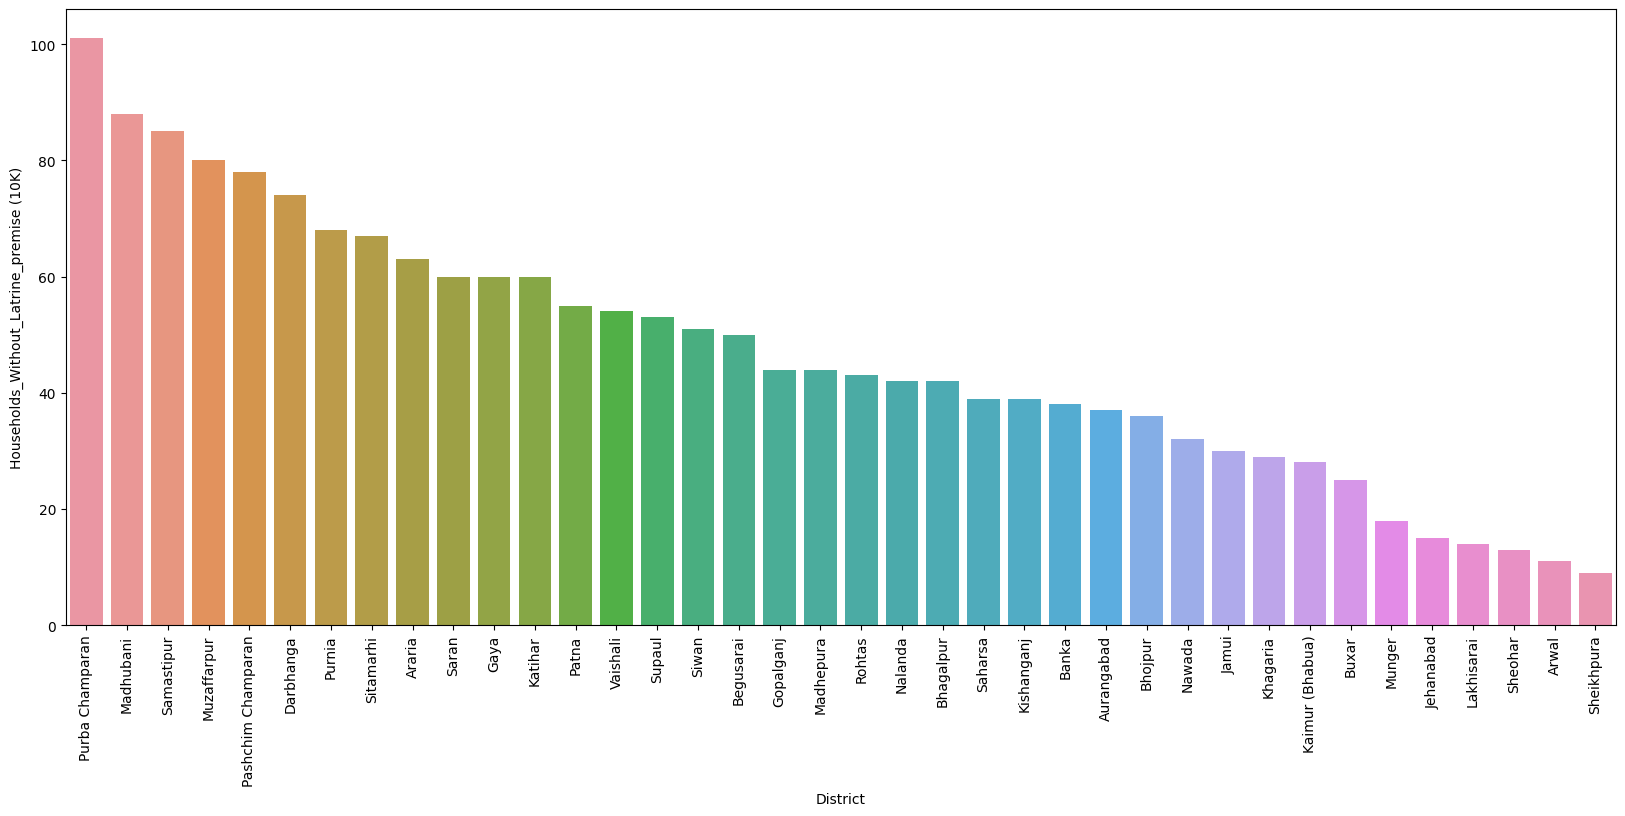

In [221]:
plt.figure(figsize=(20,8))
sns.barplot(data=df,x='District',y='Households_Without_Latrine_premise (10K)',
            order=df.sort_values('Households_Without_Latrine_premise (10K)',ascending=False)['District'])
plt.xticks(rotation=90)

### Problem Statement 21: 
<h4>Create stored functions for the following:</h4>
<table><th>Stored Function name</th><th>Input parameter</th><th>Return parameter</th>
    <tr><td>get_population_district</td> <td>District Name</td><td>Total population of the district</td></tr>
       <tr><td>get_population</td> <td> State/UT Name</td> <td>Total population of the state</td> </tr>
        <tr><td>senior_citizen_population</td> <td>State/UT Name</td> <td>Total Senior citizens in the state</td> </tr>
       <tr> <td>get_hospital_beds</td> <td> State/UT Name</td> <td>Total Number of hospital beds in the State/UT</td> </tr>
       <tr> <td>get_govt_hospital_beds</td> <td>State/UT Name</td> <td>Total Number of government hospital beds in the State/UT</td></tr>
       <tr> <td>beds_per_lakh</td> <td>State/UT Name</td> <td>Total Number of hospital beds per 1 lakh people</td> </tr>
       <tr> <td>govt_beds_per_lakh</td> <td>State/UT Name</td> <td>Total Number of government hospital beds per 1 lakh people</td> </tr></table>


In [222]:
def get_population_district(district):
    
    df=census.copy()
    
    return int(df.loc[df['District']==district,
                      ['Population']]['Population']
               .mean())

In [223]:
print(get_population_district('Alwar'))

3674179


In [224]:
def get_population(state):
    
    df=census.copy()
    
    return int(df.loc[df['State/UT']==state,
                      ['Population']].sum())

In [225]:
get_population('Rajasthan')

68548437

In [226]:
def senior_citizen_population(state):
    
    df=census.copy()
    
    return int(df.loc[df['State/UT']==state,
                      ['Senior_Citizen']].sum())

In [227]:
senior_citizen_population('Rajasthan')

9526395

In [228]:
def get_hospital_beds(state):
    
    df=hospital.copy()
    
    return int(df.loc[df['State/UT']==state,
                      ['HospitalBeds']].sum())

In [229]:
get_hospital_beds('Rajasthan')

51844

In [230]:
def get_govt_hospitals(state):
    
    df=govt_hosp.copy()
    
    df['Hospitals']=df['Rural_Government_Hospitals']
    +df['Urban_Government_Hospitals']
    
    return int(df.loc[df['State/UT']==state,['Hospitals']]
               .sum())

In [231]:
govt_hosp.head()

State/UT  Rural_Government_Hospitals  Rural_Government_Beds  \
0     Andhra Pradesh                         193                   6480   
1  Arunachal Pradesh                         208                   2136   
2              Assam                        1176                  10944   
3              Bihar                         930                   6083   
4       Chhattisgarh                         169                   5070   

   Urban_Government_Hospitals  Urban_Government_Beds Last_Updated  
0                          65                  16658   2017-01-01  
1                          10                    268   2017-12-31  
2                          50                   6198   2017-12-31  
3                         103                   5936   2016-12-31  
4                          45                   4342   2016-01-01

In [232]:
def get_govt_hospital_beds(state):
    
    df=govt_hosp.copy()
    
    df['Beds']=df['Rural_Government_Beds']
    +df['Urban_Government_Beds']
    
    return int(df.loc[df['State/UT']==state,['Beds']].sum())

In [233]:
get_govt_hospital_beds('Bihar')

6083

In [234]:
def beds_per_lakh(state):
    
    df=beds.copy()
    
    df['beds_per_lakh']=df['Beds_Per_10k']*10
    
    return int(df.loc[df['State/UT']==state,
                      ['beds_per_lakh']].sum())

In [235]:
beds_per_lakh('Assam')

61

In [236]:
def govt_beds_per_lakh(state):
    df1=beds.copy()
    df1=df1[['State/UT','Population']]
    
    df2=govt_hosp.copy()
    df2=df2[['State/UT','Rural_Government_Beds','Urban_Government_Beds']]
    
    df2['Beds']=df2['Rural_Government_Beds']+df2['Urban_Government_Beds']
    
    joined=pd.merge(df1,df2,on=['State/UT'])
    
    joined['Beds_per_lakh']=(joined['Beds']/joined['Population'])*100000
    
    return int(joined.loc[joined['State/UT']==state,['Beds_per_lakh']].sum())

In [237]:
govt_beds_per_lakh('Delhi')

145

### Problem Statement 22: 
It was reported* that in the north-eastern states, senior citizens are facing some issues in getting beds in a government hospital. Amir, from the department of healthcare, has requested a report on the healthcare situation in the north-eastern states.

The north-eastern states are listed in (Data/north_east_states.txt). Read the file and extract the state names using python and write a query to find the following information about those states from the database. Use the stored functions created earlier wherever relevant.<br>
	State Name<br>
	Population<br>
	Senior Citizen Population<br>
	Number of Government Hospital<br>
	Number of Government Hospital Beds<br>
	Number of Government Hospital beds for 1 Lakh population<br> 
(Round the number to the nearest integer)<br>
	Number of Government Hospital beds for 1 Lakh senior citizen<br>
(Round the number to the nearest integer)<br>

The rows should be sorted by the number of Government Hospital beds for 1 Lakh senior citizens in ascending order.


#### Create north_east_states.txt manually

In [238]:
with open('Data/north_east_states.txt','r') as fptr:
    lines=fptr.readlines()
    print(lines)
states=[x[:-1] for x in lines]


['Arunachal Pradesh\n', 'Assam\n', 'Meghalaya\n', 'Manipur\n', 'Nagaland\n', 'Sikkim\n', 'Tripura\n', 'Mizoram\n']


In [239]:
# to create new df, create a dictionary with all blank values 
north_east={'State/UT':[],
           'Population':[],
           'Senior_Citizen_Population':[],
           'Government_Hospitals':[],
           'Government_Hospitals_Beds':[],
           'Govt_Beds_Per_Lakh':[]}

In [240]:
for state in states:
    north_east['State/UT'].append(state)
    north_east['Population'].append(get_population(state))
    north_east['Senior_Citizen_Population'].append(senior_citizen_population(state))
    north_east['Government_Hospitals'].append(get_govt_hospitals(state))
    north_east['Government_Hospitals_Beds'].append(get_govt_hospital_beds(state))
    north_east['Govt_Beds_Per_Lakh'].append(govt_beds_per_lakh(state))
    

In [241]:
north_east

{'State/UT': ['Arunachal Pradesh',
  'Assam',
  'Meghalaya',
  'Manipur',
  'Nagaland',
  'Sikkim',
  'Tripura',
  'Mizoram'],
 'Population': [1383727,
  31205576,
  2966889,
  2855794,
  1978502,
  610577,
  3673917,
  1097206],
 'Senior_Citizen_Population': [139635,
  4127732,
  287754,
  409796,
  211983,
  82725,
  568604,
  144061],
 'Government_Hospitals': [208, 1176, 143, 23, 21, 24, 99, 56],
 'Government_Hospitals_Beds': [2136, 10944, 1970, 730, 630, 260, 1140, 604],
 'Govt_Beds_Per_Lakh': [173, 54, 150, 49, 95, 255, 120, 182]}

In [242]:
north_east_df=pd.DataFrame(north_east)
north_east_df

State/UT  Population  Senior_Citizen_Population  \
0  Arunachal Pradesh     1383727                     139635   
1              Assam    31205576                    4127732   
2          Meghalaya     2966889                     287754   
3            Manipur     2855794                     409796   
4           Nagaland     1978502                     211983   
5             Sikkim      610577                      82725   
6            Tripura     3673917                     568604   
7            Mizoram     1097206                     144061   

   Government_Hospitals  Government_Hospitals_Beds  Govt_Beds_Per_Lakh  
0                   208                       2136                 173  
1                  1176                      10944                  54  
2                   143                       1970                 150  
3                    23                        730                  49  
4                    21                        630                  95  
5                    24                        260                 255  
6                    99                       1140                 120  
7                    56                        604                 182

In [243]:
df=north_east_df.copy()
df['Govt_beds_per_lakh_SC']=(df['Government_Hospitals_Beds']*100000/df['Senior_Citizen_Population']).astype(int)

In [244]:
df=df.sort_values('Govt_beds_per_lakh_SC')
df=df.reset_index()
df.drop(columns=['index'],axis=1,inplace=True)
df

State/UT  Population  Senior_Citizen_Population  \
0            Manipur     2855794                     409796   
1            Tripura     3673917                     568604   
2              Assam    31205576                    4127732   
3           Nagaland     1978502                     211983   
4             Sikkim      610577                      82725   
5            Mizoram     1097206                     144061   
6          Meghalaya     2966889                     287754   
7  Arunachal Pradesh     1383727                     139635   

   Government_Hospitals  Government_Hospitals_Beds  Govt_Beds_Per_Lakh  \
0                    23                        730                  49   
1                    99                       1140                 120   
2                  1176                      10944                  54   
3                    21                        630                  95   
4                    24                        260                 255   
5                    56                        604                 182   
6                   143                       1970                 150   
7                   208                       2136                 173   

   Govt_beds_per_lakh_SC  
0                    178  
1                    200  
2                    265  
3                    297  
4                    314  
5                    419  
6                    684  
7                   1529

### Problem Statement 23: 
The Government wants to run a scheme that would help people build in-premise toilets. 
For that purpose, a secretary has requested a district-wise report using the census data.

Using a stored procedure, Create a district-wise report that shows the total population of each district, the total number of households in the district, the number of households that do NOT have on-premise toilets, and the percentage of the number of households that do NOT toilets in premise to the total number of households. Sort the data in a way that is most useful for the secretary


In [245]:
# here i use df_t dataframe that is useful again
df1=df_t.copy()

In [246]:
df2=census.copy()

In [247]:
df2=df2[['State/UT','District']]

In [248]:
joined=pd.merge(df1,df2,on=['State/UT','District'])

In [249]:
joined

State/UT                   District  Households  \
0              Jammu and Kashmir                    Kupwara    181664.0   
1              Jammu and Kashmir                     Badgam    187839.0   
2                        Laddakh                Leh(Ladakh)     54394.0   
3                        Laddakh                     Kargil     48144.0   
4              Jammu and Kashmir                      Punch    147408.0   
..                           ...                        ...         ...   
635                   Puducherry                       Mahe     12110.0   
636                   Puducherry                   Karaikal     69333.0   
637  Andaman and Nicobar Islands                   Nicobars     15958.0   
638  Andaman and Nicobar Islands  North  And Middle Andaman     40185.0   
639  Andaman and Nicobar Islands              South Andaman     85532.0   

     Livable  Dilapidated  Latrine_premise  Population  
0     104093        14351            92466    870354.0  
1      83964         7137           158348    753745.0  
2      28502          979            49172    133487.0  
3      34952         1540            46651    140802.0  
4      83875         3390            27565    476835.0  
..       ...          ...              ...         ...  
635     1913          133            11843     41816.0  
636    20245         1109            42015    200222.0  
637     3798          191            12910     36842.0  
638    17922         1125            19409    105597.0  
639    22580         1881            66971    238142.0  

[640 rows x 7 columns]

In [250]:
joined['No_Latrine_Premise']=joined['Households']-joined['Latrine_premise']

In [251]:
joined=joined[['State/UT','District','Population','Households','No_Latrine_Premise']]

In [252]:
joined['Percent_No_Latrine_Premise']=joined['No_Latrine_Premise']*100/joined['Households']

C:\Users\miles\AppData\Local\Temp\ipykernel_21588\2408039801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined['Percent_No_Latrine_Premise']=joined['No_Latrine_Premise']*100/joined['Households']


In [263]:
joined

State/UT                   District  Population  \
0              Jammu and Kashmir                    Kupwara    870354.0   
1              Jammu and Kashmir                     Badgam    753745.0   
2                        Laddakh                Leh(Ladakh)    133487.0   
3                        Laddakh                     Kargil    140802.0   
4              Jammu and Kashmir                      Punch    476835.0   
..                           ...                        ...         ...   
635                   Puducherry                       Mahe     41816.0   
636                   Puducherry                   Karaikal    200222.0   
637  Andaman and Nicobar Islands                   Nicobars     36842.0   
638  Andaman and Nicobar Islands  North  And Middle Andaman    105597.0   
639  Andaman and Nicobar Islands              South Andaman    238142.0   

     Households  No_Latrine_Premise  Percent_No_Latrine_Premise  
0      181664.0             89198.0                   49.100537  
1      187839.0             29491.0                   15.700147  
2       54394.0              5222.0                    9.600324  
3       48144.0              1493.0                    3.101113  
4      147408.0            119843.0                   81.300201  
..          ...                 ...                         ...  
635     12110.0               267.0                    2.204789  
636     69333.0             27318.0                   39.401151  
637     15958.0              3048.0                   19.100138  
638     40185.0             20776.0                   51.700883  
639     85532.0             18561.0                    21.70065  

[640 rows x 6 columns]

In [ ]:
joined.to_csv('Clean_Data/sanitary.csv')

In [272]:
df3=joined.groupby('State/UT')['Households','No_Latrine_Premise'].sum()

C:\Users\miles\AppData\Local\Temp\ipykernel_21588\2767329949.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3=joined.groupby('State/UT')['Households','No_Latrine_Premise'].sum()


In [273]:
df3['Percent_No_latrine']=df3['No_Latrine_Premise']*100/df3['Households']

In [275]:
df3.to_csv('Clean_Data/sanitary2.csv')

In [254]:
census_plot=pd.merge(census_plot,joined[['State/UT','District','Percent_No_Latrine_Premise']],on=['State/UT','District'])

In [255]:
df2 = pd.merge(dist, census_plot, on='District', how='left')
gdf = gpd.GeoDataFrame(df2)
gdf = gdf.to_crs(epsg=3857)

In [256]:
census_plot['Percent_No_Latrine_Premise']=census_plot['Percent_No_Latrine_Premise'].fillna(0)

In [262]:
census_plot['Percent_No_Latrine_Premise'].isnull().nunique()

1

### Problem Statement 24: 
An Agency wants to find out if there is a relationship between dilapidated homes and the lack of households for the people. 
Using a stored procedure, create a report that shows the name of each district, its population, the number of liveable houses per 1000 people, and the number of dilapidated households per 1000 people. 
Visualize the relation between these values using an appropriate plot.


In [ ]:
# here i use df_t dataframe that is useful again
df1=df_t.copy()
df2=census.copy()
df2=df2[['State/UT','District',]]

In [ ]:
joined=pd.merge(df1,df2,on=['State/UT','District'])

In [ ]:
joined.head()

In [ ]:
joined=joined[['State/UT','District','Population','Livable','Dilapidated']]

In [ ]:
joined['Livable_Per_1k']=joined['Livable']*1000/joined['Population']

In [ ]:
joined['Dilapidated_Per_1k']=joined['Dilapidated']*1000/joined['Population']

In [259]:
joined.head()

State/UT     District  Population  Households  No_Latrine_Premise  \
0  Jammu and Kashmir      Kupwara    870354.0    181664.0             89198.0   
1  Jammu and Kashmir       Badgam    753745.0    187839.0             29491.0   
2            Laddakh  Leh(Ladakh)    133487.0     54394.0              5222.0   
3            Laddakh       Kargil    140802.0     48144.0              1493.0   
4  Jammu and Kashmir        Punch    476835.0    147408.0            119843.0   

   Percent_No_Latrine_Premise  
0                   49.100537  
1                   15.700147  
2                    9.600324  
3                    3.101113  
4                   81.300201

C:\Users\miles\AppData\Local\Temp\ipykernel_21588\1153052812.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=joined.corr(),annot=True)


<AxesSubplot: >

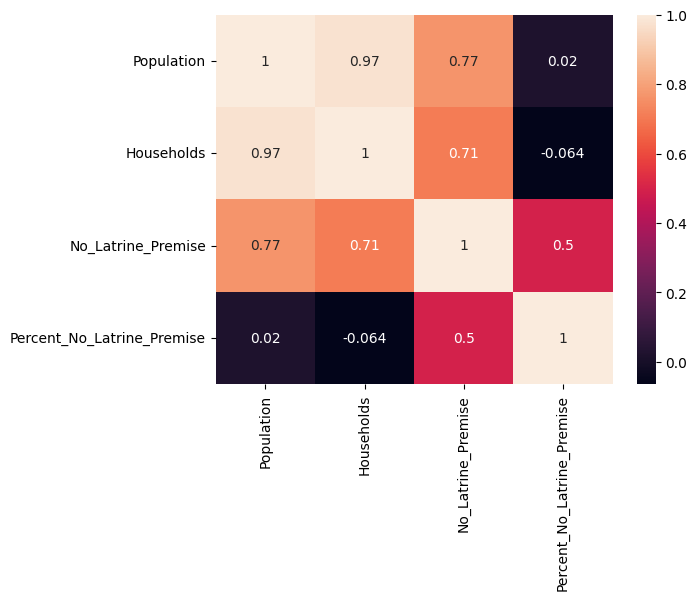

In [260]:
sns.heatmap(data=joined.corr(),annot=True)

### Problem Statement 25: 
The rural development department has requested a report on the healthcare situation in rural areas as compared to urban areas.
Write a query to find the number of hospital beds and government hospital beds per 1 lakh people for rural and urban areas separately for each state, along with the difference between them. 


In [ ]:
# for this we need rural and urban population, so skip this 
